In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats
import janitor

    st.markdown("""
    - **HeartDisease**: Target variable indicating if the individual has heart disease.
    - **BMI**: Body Mass Index. Indicates if body weight is normal, underweight, or overweight based on height and weight.
    - **Smoking**: Indicates if the individual is a smoker. Smoking significantly impacts cardiovascular health.
    - **AlcoholDrinking**: Indicates alcohol consumption, which can cause temporary and permanent heart issues.
    - **Stroke**: Indicates if the individual has had a stroke. Heart conditions are closely linked with stroke risk.
    - **PhysicalHealth**: Number of days in the past 30 days the individual experienced poor physical health.
    - **MentalHealth**: Number of days in the past 30 days the individual experienced poor mental health.
    """)
mentalHealth : [30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]

MentalHealth: Number of mentally unhealthy days in the past 30 days.

what does the data mean?


ChatGPT said:
This data represents the number of mentally unhealthy days a person experienced over the past 30 days, as reported in a survey or dataset. Here's how to interpret the values:

The column is called MentalHealth.

Each number corresponds to a respondent's answer to the question:
"Thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?"

Example Interpretations:
0: The person had no mentally unhealthy days — their mental health was good for the entire month.

5: The person had 5 days in the past 30 where their mental health was not good.

30: The person had mentally unhealthy days for the entire month.

Other values (like 3, 14, 25, etc.) show varying degrees of mental health struggles during the month.

Overall Meaning:
This feature helps quantify mental health burden on an individual level. It can be used in analysis to:

Understand population mental health trends.

Correlate mental health with other factors like physical health, sleep, chronic diseases, lifestyle habits (e.g., smoking, drinking).

Predict outcomes like risk of heart disease, hospitalization, or reduced quality of life.

Let me know if you’d like a visualization or further statistical analysis of this feature!









People with heart disease tend to experience more mentally unhealthy days than those without heart disease. There’s also a wider variation in mental health struggles among heart disease patients.

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('./dataset/heart_2020_cleaned.csv')

## Data Information

In [4]:
df.head()

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1              Yes  Very good        7.0     No            No         No  
2              Yes       Fair        8.0    Yes            No         No  
3               No       Good        6.0     No            No        Yes  
4              Yes  Very good        8.0     No            No         No

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [6]:
df.describe()

BMI  PhysicalHealth   MentalHealth      SleepTime
count  319795.000000    319795.00000  319795.000000  319795.000000
mean       28.325399         3.37171       3.898366       7.097075
std         6.356100         7.95085       7.955235       1.436007
min        12.020000         0.00000       0.000000       1.000000
25%        24.030000         0.00000       0.000000       6.000000
50%        27.340000         0.00000       0.000000       7.000000
75%        31.420000         2.00000       3.000000       8.000000
max        94.850000        30.00000      30.000000      24.000000

In [7]:
df.duplicated().sum()

18078

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(301717, 18)

In [10]:
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

### Hypothesis: There are outliers in the data for both maximum and minimum values.

In [11]:
## cleans the column names
# df = df.clean_names(case_type='lower')

In [12]:
missing_values = df.isnull().sum()

missing_percentage = (missing_values / len(df)) * 100

print("\nMissing Values (Percentage):\n", missing_percentage)


Missing Values (Percentage):
 HeartDisease        0.0
BMI                 0.0
Smoking             0.0
AlcoholDrinking     0.0
Stroke              0.0
PhysicalHealth      0.0
MentalHealth        0.0
DiffWalking         0.0
Sex                 0.0
AgeCategory         0.0
Race                0.0
Diabetic            0.0
PhysicalActivity    0.0
GenHealth           0.0
SleepTime           0.0
Asthma              0.0
KidneyDisease       0.0
SkinCancer          0.0
dtype: float64


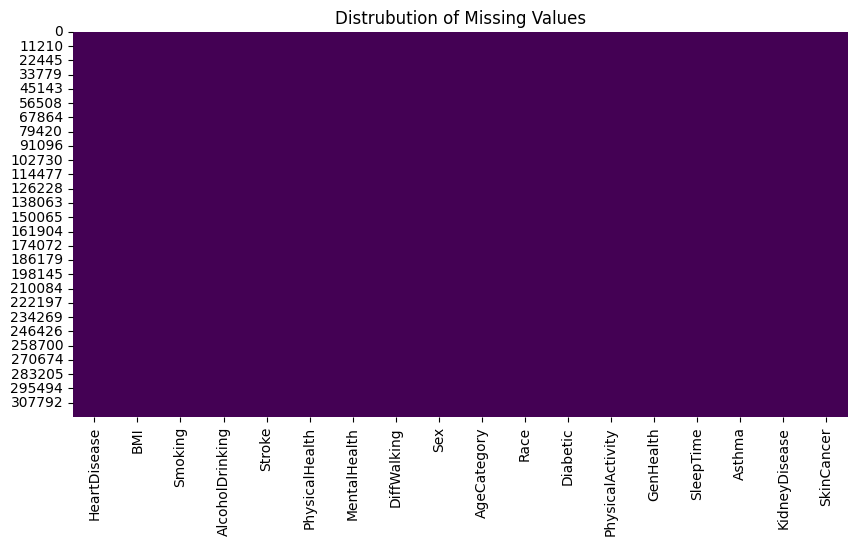

In [13]:
# Visualization of missing values rate
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Distrubution of Missing Values")
plt.show()

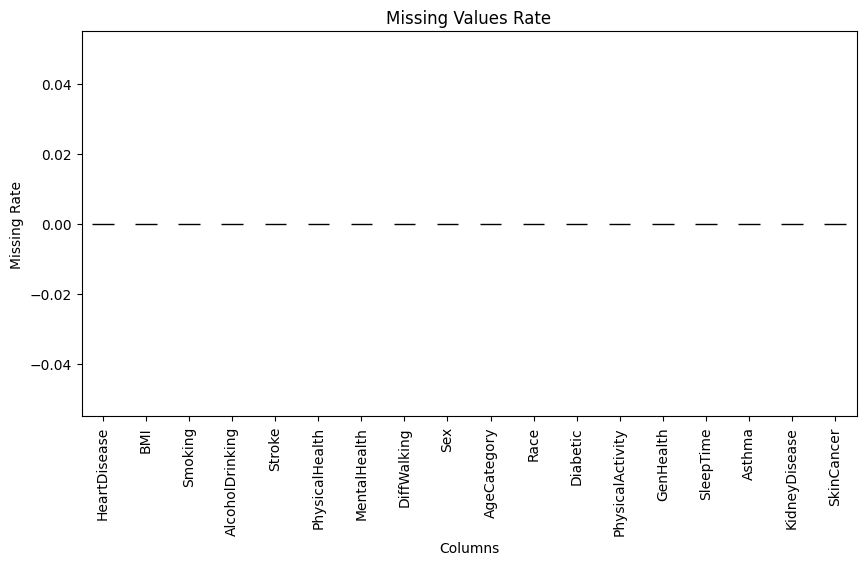

In [14]:
missing_rate = df.isnull().mean()
missing_rate.plot(kind="bar", figsize=(10, 5), color="skyblue", edgecolor="black")
plt.title("Missing Values Rate")
plt.xlabel("Columns")
plt.ylabel("Missing Rate")
plt.show()

In [15]:
# Check the data types and number of unique values ​​in each column
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique value ({df[column].dtype})")

HeartDisease: 2 unique value (object)
BMI: 3604 unique value (float64)
Smoking: 2 unique value (object)
AlcoholDrinking: 2 unique value (object)
Stroke: 2 unique value (object)
PhysicalHealth: 31 unique value (float64)
MentalHealth: 31 unique value (float64)
DiffWalking: 2 unique value (object)
Sex: 2 unique value (object)
AgeCategory: 13 unique value (object)
Race: 6 unique value (object)
Diabetic: 4 unique value (object)
PhysicalActivity: 2 unique value (object)
GenHealth: 5 unique value (object)
SleepTime: 24 unique value (float64)
Asthma: 2 unique value (object)
KidneyDisease: 2 unique value (object)
SkinCancer: 2 unique value (object)


### Extracring numerical Variables from the dataset


In [16]:
numeric_features=['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
numeric_features

['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

### Ectracting Categorical Variables from the dataset

In [17]:
df.head()

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1              Yes  Very good        7.0     No            No         No  
2              Yes       Fair        8.0    Yes            No         No  
3               No       Good        6.0     No            No        Yes  
4              Yes  Very good        8.0     No            No         No

In [18]:
# Separate categorical and numerical columns
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Features:")
print(categorical_features)

print("\nNumerical Features:")
print(numerical_features)


Categorical Features:
['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

Numerical Features:
['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']


### What features characterize our data sample?

##### HeartDisease - target trait.
##### BMI - a value that allows you to assess the degree of correspondence between a person's mass and his height, and thereby indirectly judge whether the mass is insufficient, normal or excessive. It is important in determining the indications for the need for treatment.
##### Smoking is a major risk factor for cardiovascular disease. When smoke from a cigarette is inhaled, the reaction of the cardiovascular system immediately follows: within one minute, the heart rate begins to rise, increasing by 30% within ten minutes of smoking. The bad habit also increases blood pressure, fibrinogen and platelet levels, making blood clots more likely.
##### AlcoholDrinking - alcohol causes not only temporary disturbances in the functioning of the heart, but also permanent ones. Heart pain after alcohol is not the only health problem associated with alcohol consumption.
##### Stroke - Ischemic stroke occurs 4 times more often than hemorrhagic. One of the leading causes of this suffering is heart disease, which impairs its functioning, as a result of which the blood flow in the arteries is disturbed and the blood supply to the brain is reduced. Another cause of stroke in heart disease is thromboembolism, when clots form in the cavities of the heart (most often with heart failure) - blood clots.
##### PhysicalHealth - how many days in a month did you feel poor physical health.
##### MentalHealth - how many days in a month did you feel poor mental health.

/var/folders/lf/cj1l0kg94pxgnvq94k90_rz00000gn/T/ipykernel_1107/4087597156.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HeartDisease', data=df, palette=colors, ax=ax1)


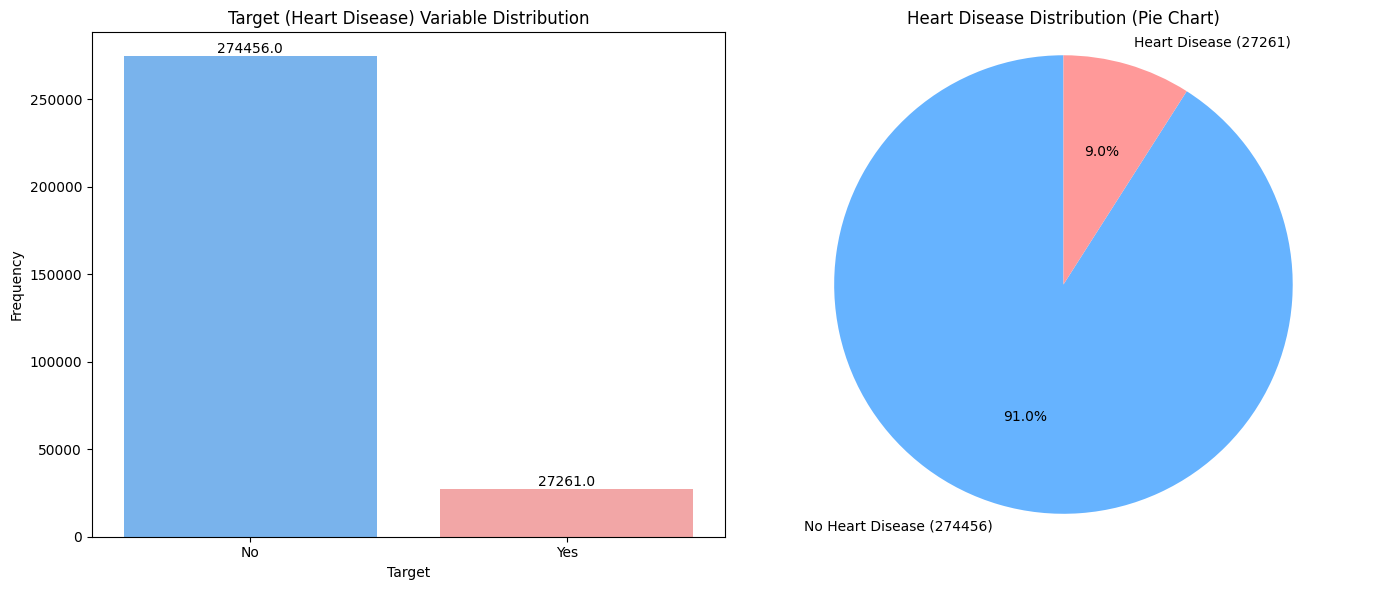

In [19]:
# Prepare data
counts = df['HeartDisease'].value_counts()
sizes = counts.values
label_map = {'No': 'No Heart Disease', 'Yes': 'Heart Disease'}
labels = [label_map[key] for key in counts.index]
colors = ['#66b3ff', '#ff9999']

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Bar Chart
sns.countplot(x='HeartDisease', data=df, palette=colors, ax=ax1)
ax1.set_title("Target (Heart Disease) Variable Distribution")
ax1.set_xlabel("Target")
ax1.set_ylabel("Frequency")

# Add count labels on top of the bars
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{height}', 
                 (p.get_x() + p.get_width() / 2., height), 
                 ha='center', va='bottom', fontsize=10)

# Pie Chart
ax2.pie(sizes,
        labels=[f'{label} ({count})' for label, count in zip(labels, sizes)],
        autopct='%1.1f%%',
        startangle=90,
        colors=colors[:len(sizes)])
ax2.set_title("Heart Disease Distribution (Pie Chart)")
ax2.axis('equal')

# Display the plots
plt.tight_layout()
plt.show()

## We are dealing with an unbalanced sample, where the majority of people are healthy meaning they do not have any heart disease or any heart related diseases.

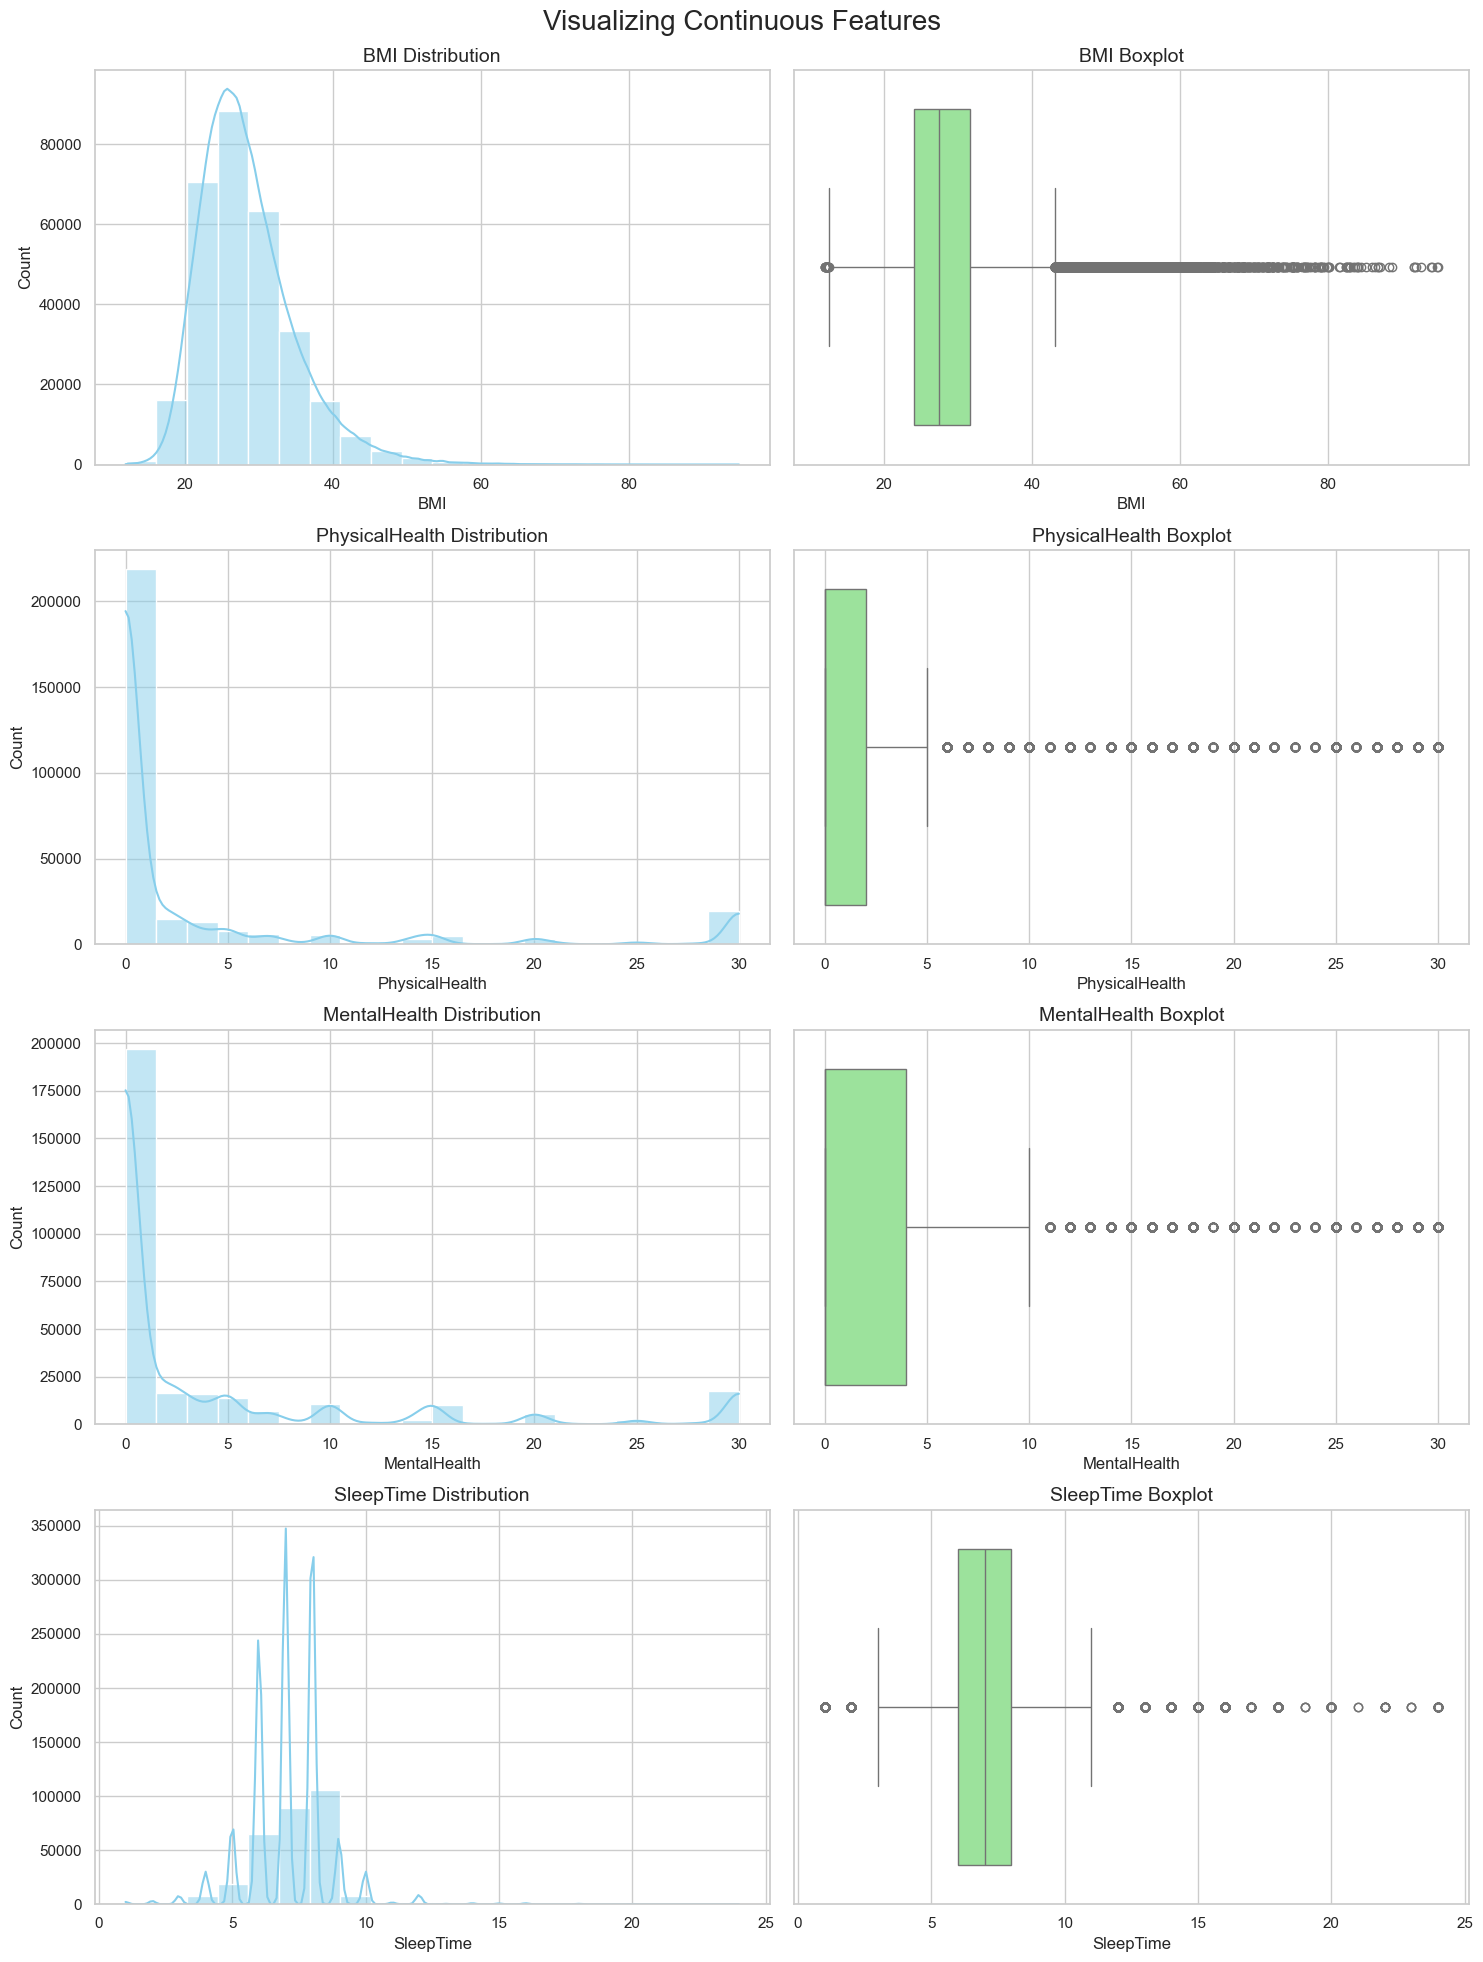

In [20]:
sns.set(style="whitegrid")

# Define the number of rows based on numeric features
num_features = len(numeric_features)

# Create subplots (rows for each numeric feature)
fig, ax = plt.subplots(num_features, 2, figsize=(15, num_features*5))

for i, feature in enumerate(numeric_features):
    # Histogram and KDE plot
    sns.histplot(df[feature], kde=True, ax=ax[i, 0], color='skyblue', bins=20)
    ax[i, 0].set_title(f'{feature} Distribution', fontsize=14)
    
    # Boxplot
    sns.boxplot(x=df[feature], ax=ax[i, 1], color='lightgreen')
    ax[i, 1].set_title(f'{feature} Boxplot', fontsize=14)
    

# Tight layout and overall title
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing Continuous Features", fontsize=20)
plt.show()

### from the above graph we can conclude that BMI variable is close to Normal Distribution however the rest are inclined toward bimodal distribution. 

## Let us have a look at the distribution of the number of people with heart disease from various factors

In [21]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
categorical_features

['HeartDisease',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

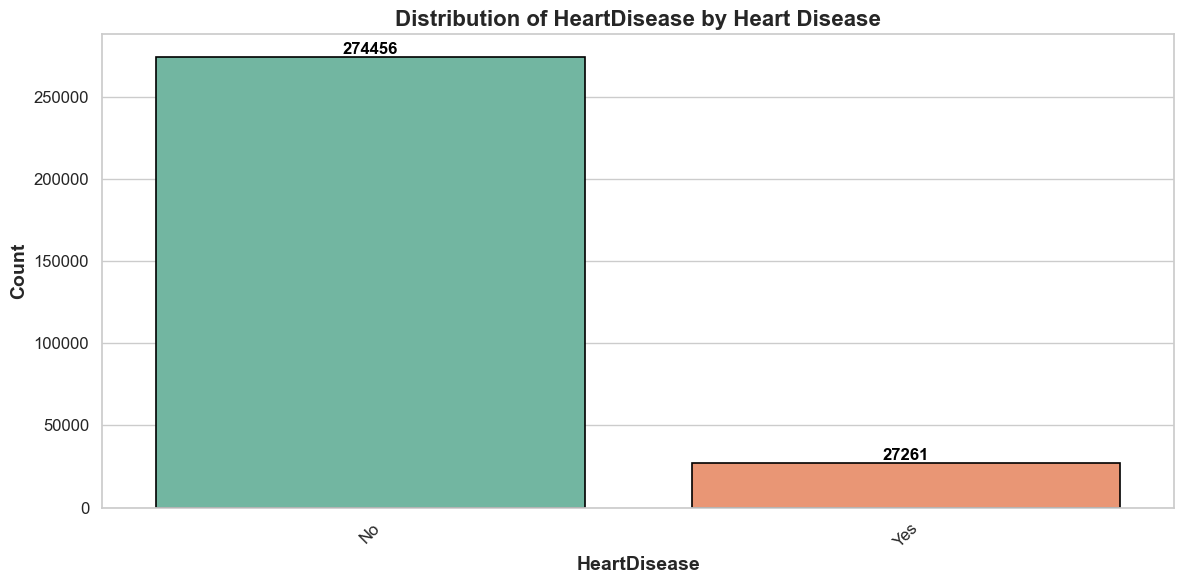

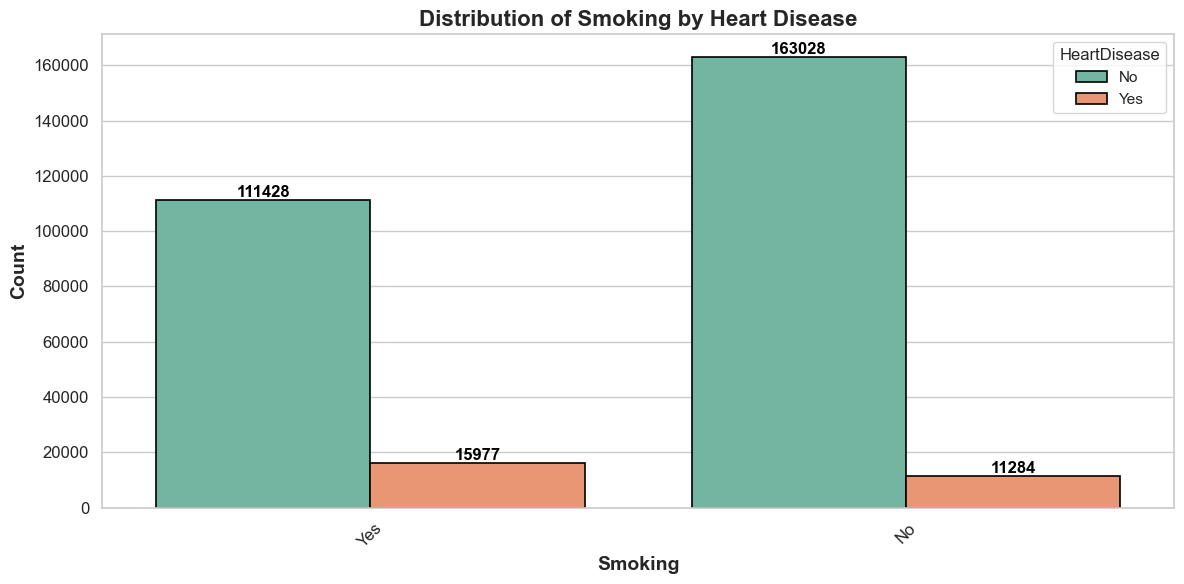

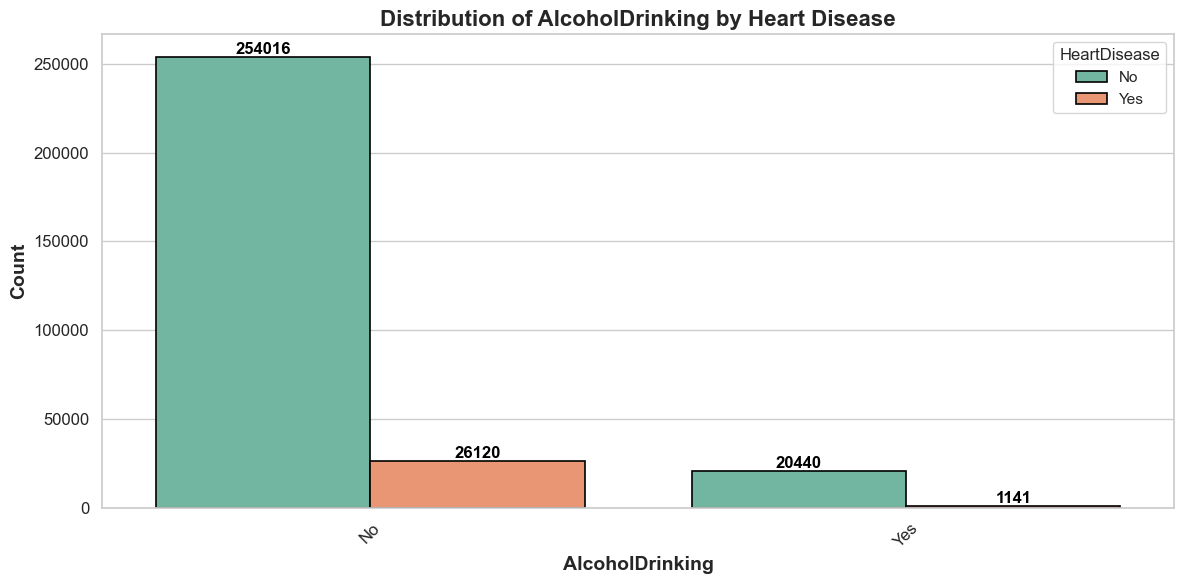

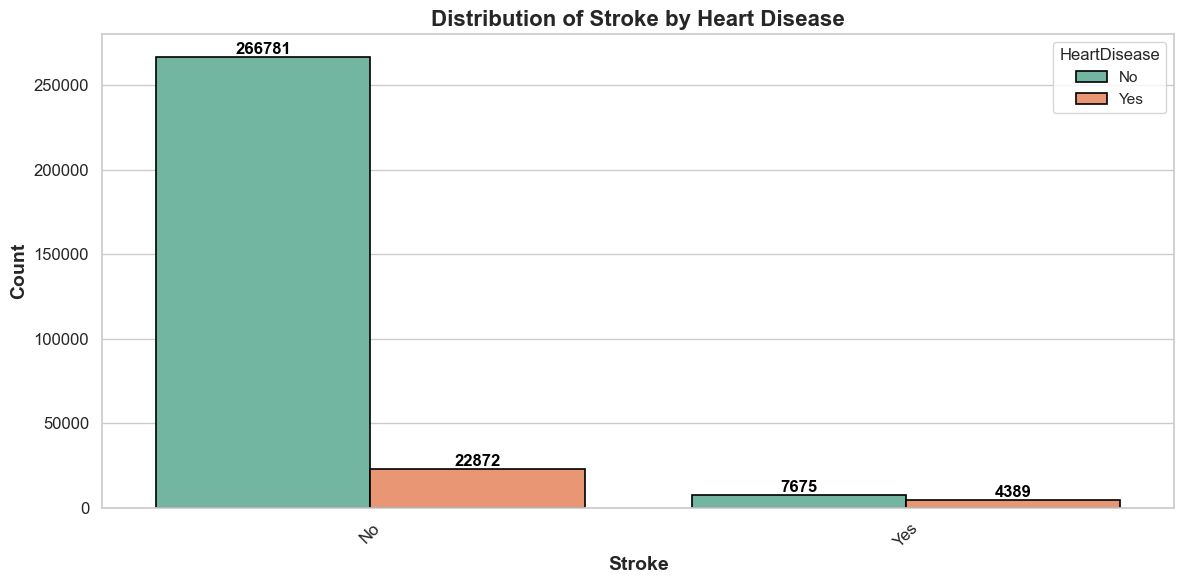

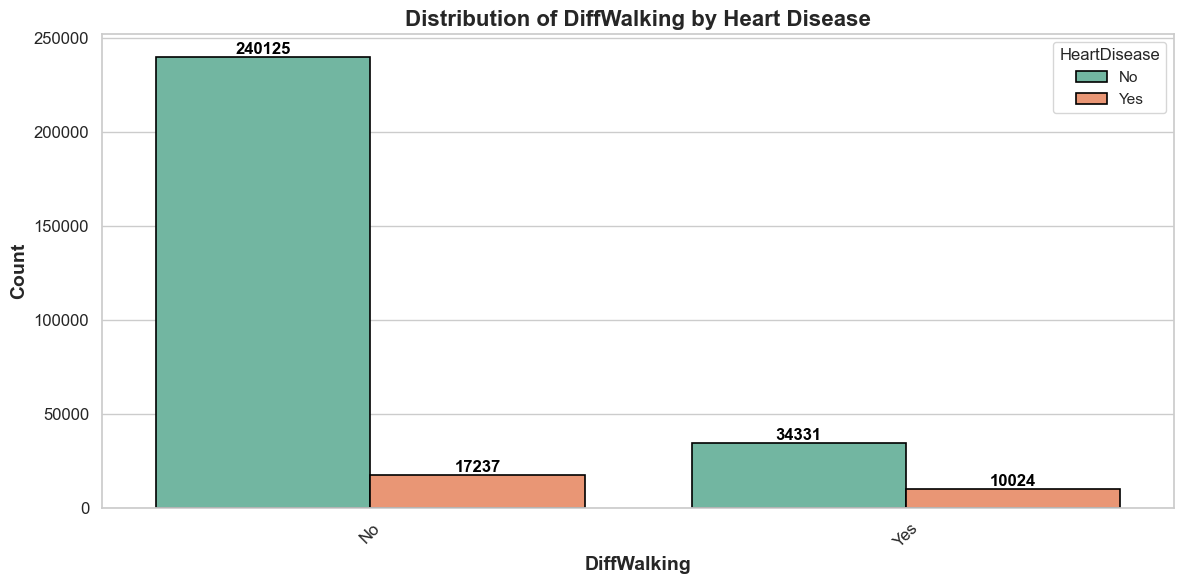

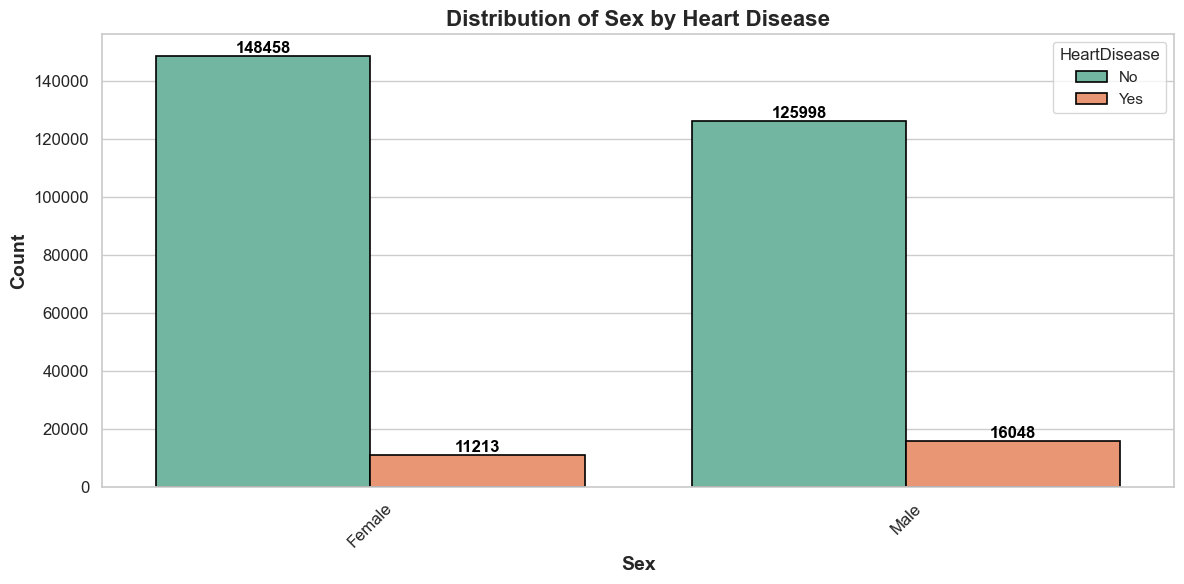

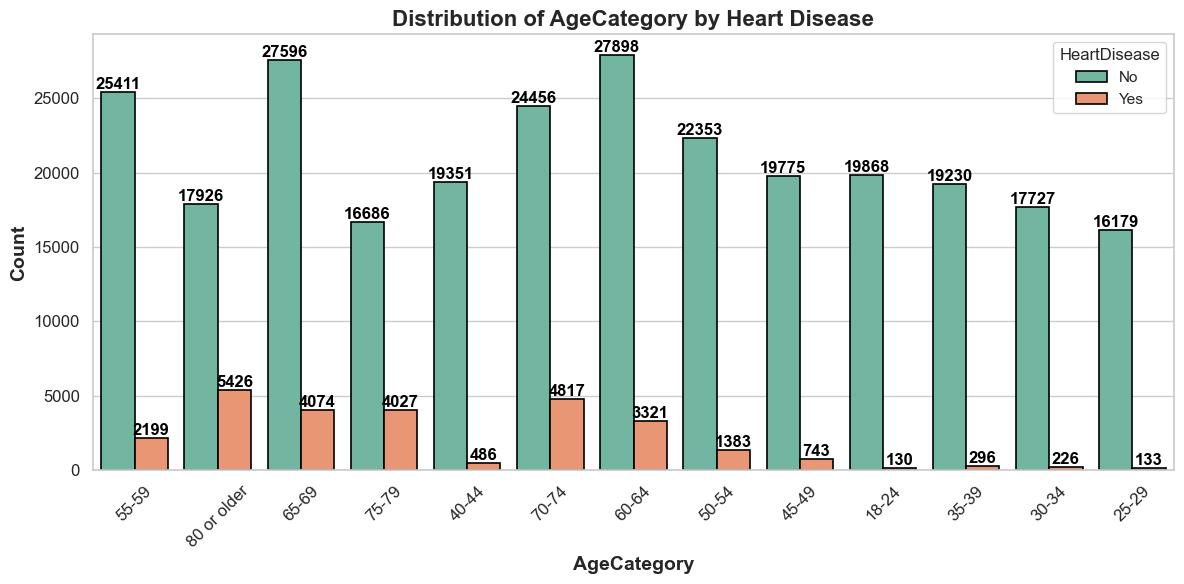

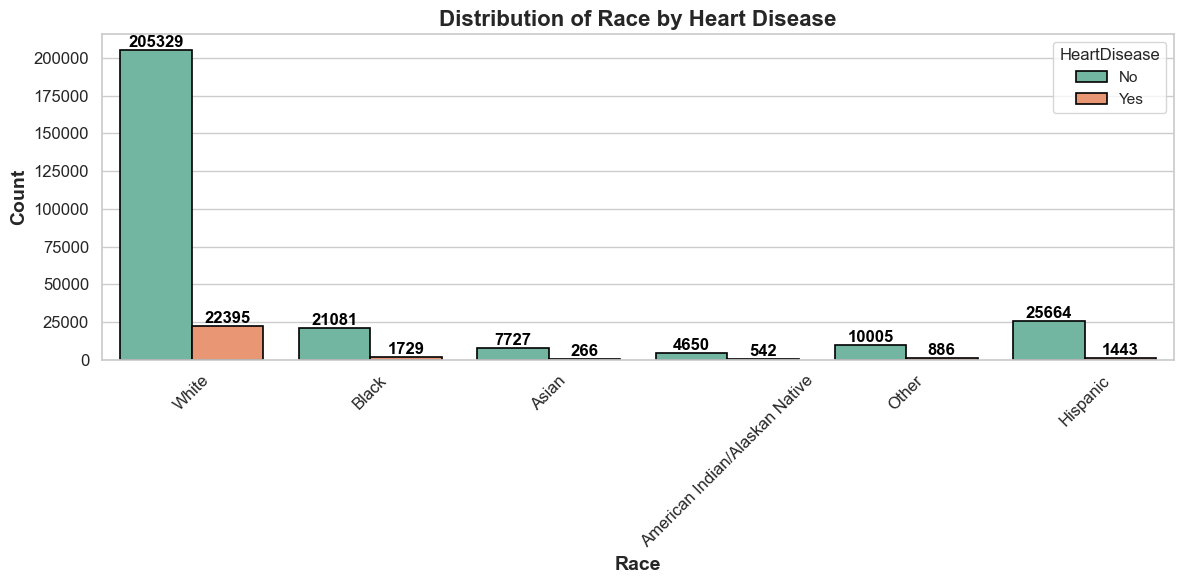

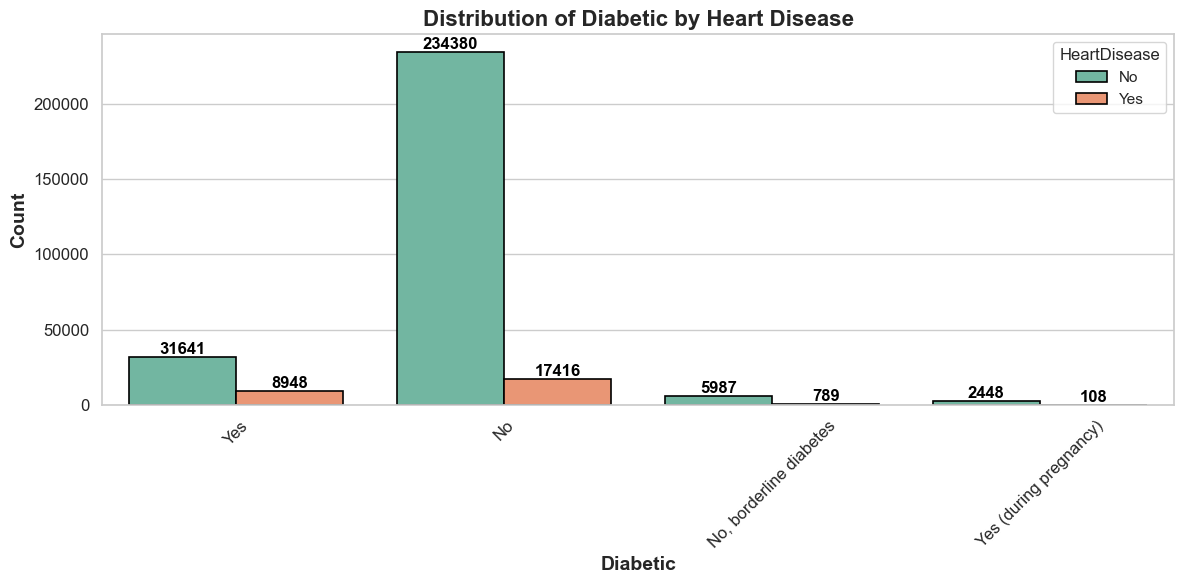

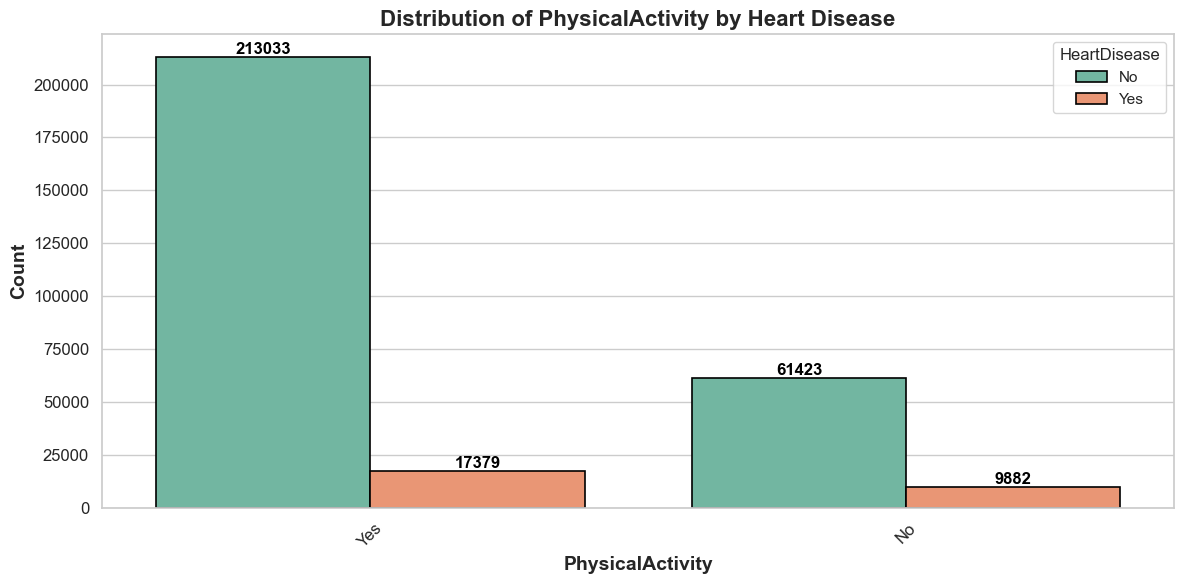

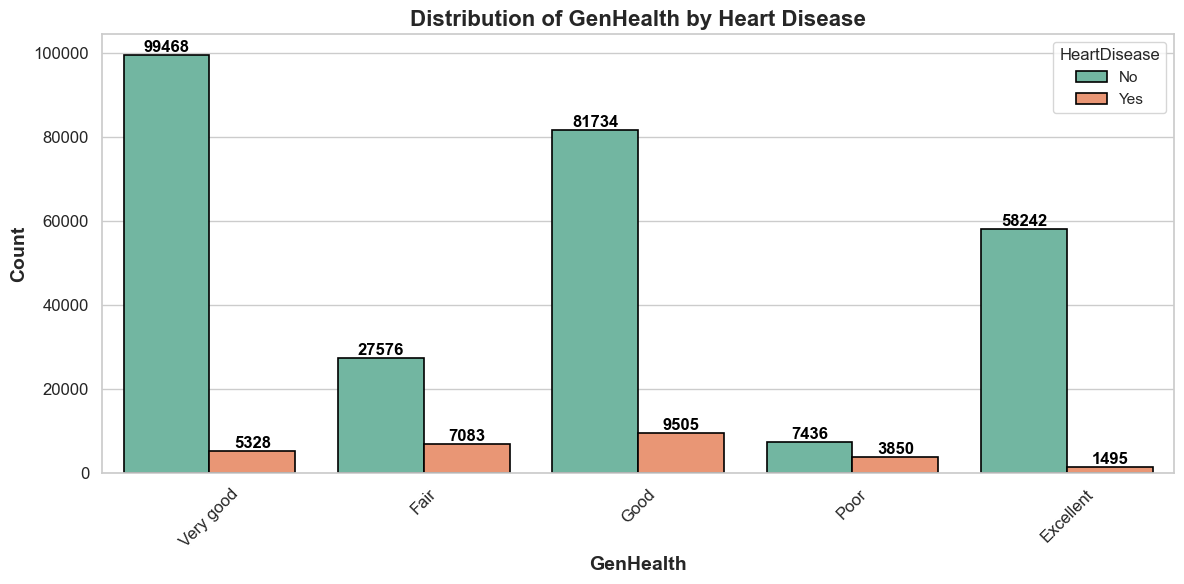

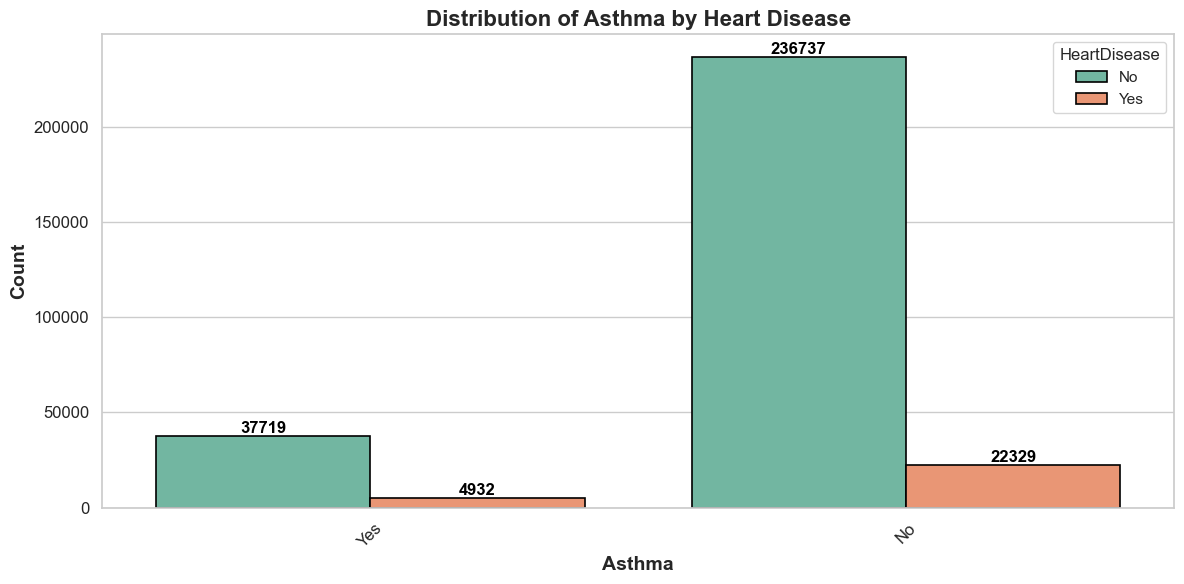

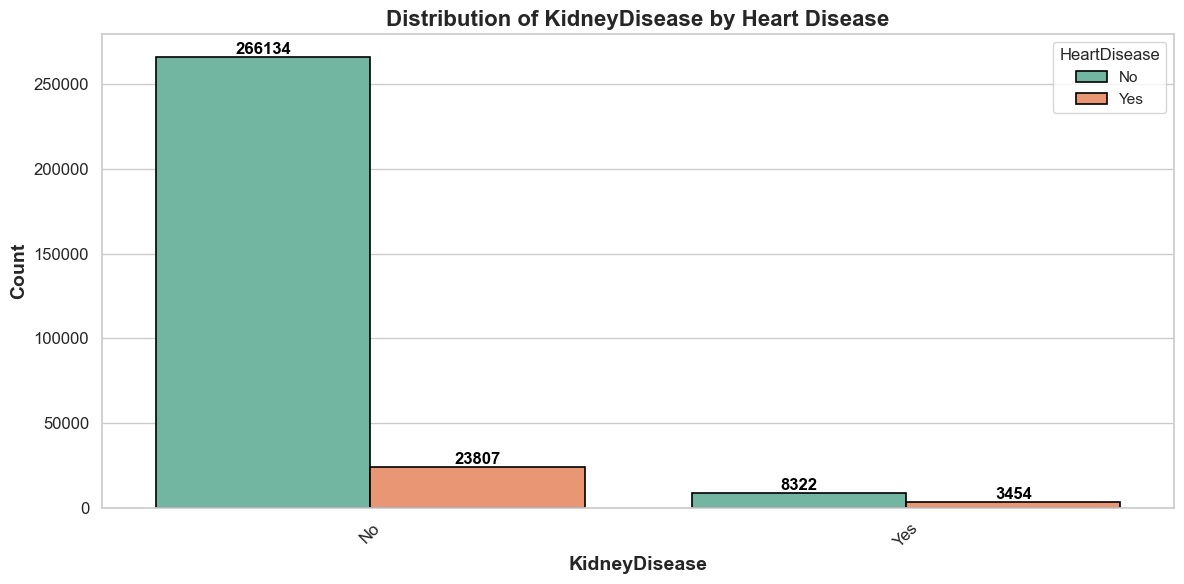

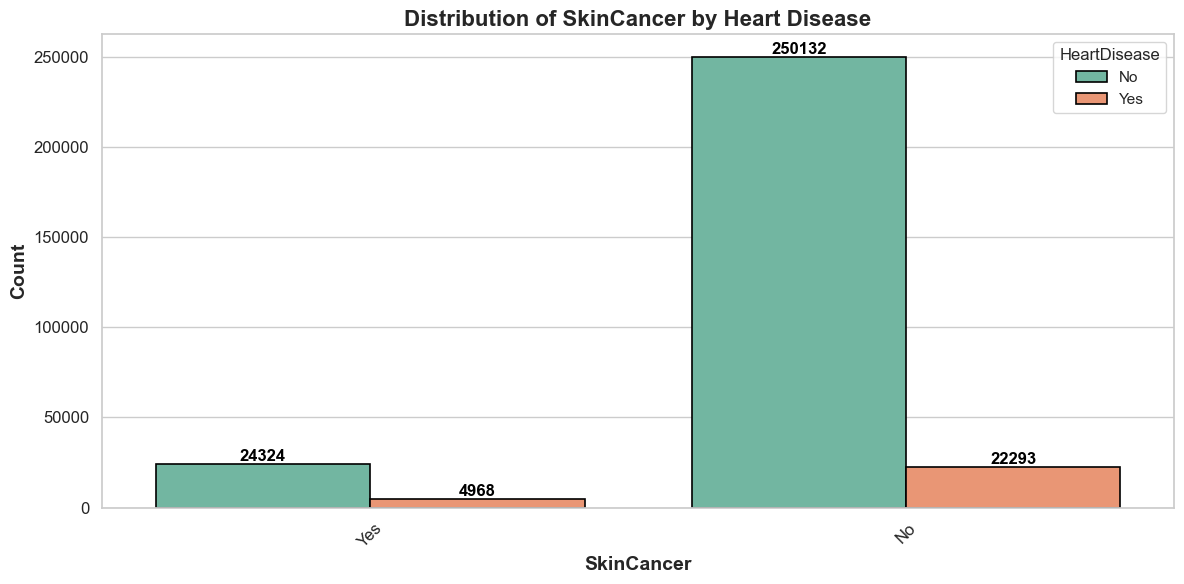

In [22]:
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    
    # Create count plot with a more pleasant color palette
    ax = sns.countplot(x=feature,
                       data=df,
                       hue='HeartDisease',
                       palette='Set2',
                       edgecolor="black",
                       linewidth=1.2)
    
    # Rotate x-axis labels
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)

    # Customize labels and title
    plt.xlabel(feature, fontsize=14, fontweight='bold')
    plt.ylabel("Count", fontsize=14, fontweight='bold')
    plt.title(f"Distribution of {feature} by Heart Disease", fontsize=16, fontweight='bold')

    # Add value labels on top of each bar
    for p in ax.patches:
        height = int(p.get_height())
        if height > 0:
            ax.annotate(f'{height}',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom',
                        fontsize=12, color='black', fontweight='bold')

    plt.tight_layout()
    plt.show()

### Let's examine outliers in numerical variables and try to remove the outliers based on 3 times the Standard Deviation of that feature

/var/folders/lf/cj1l0kg94pxgnvq94k90_rz00000gn/T/ipykernel_1107/818388841.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[feature], x=df['AlcoholDrinking'], palette='pastel')
/var/folders/lf/cj1l0kg94pxgnvq94k90_rz00000gn/T/ipykernel_1107/818388841.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=df[feature], x=df['Diabetic'], palette='muted', inner="quartile")
/var/folders/lf/cj1l0kg94pxgnvq94k90_rz00000gn/T/ipykernel_1107/818388841.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[feature], x=df['AlcoholDrinking'],

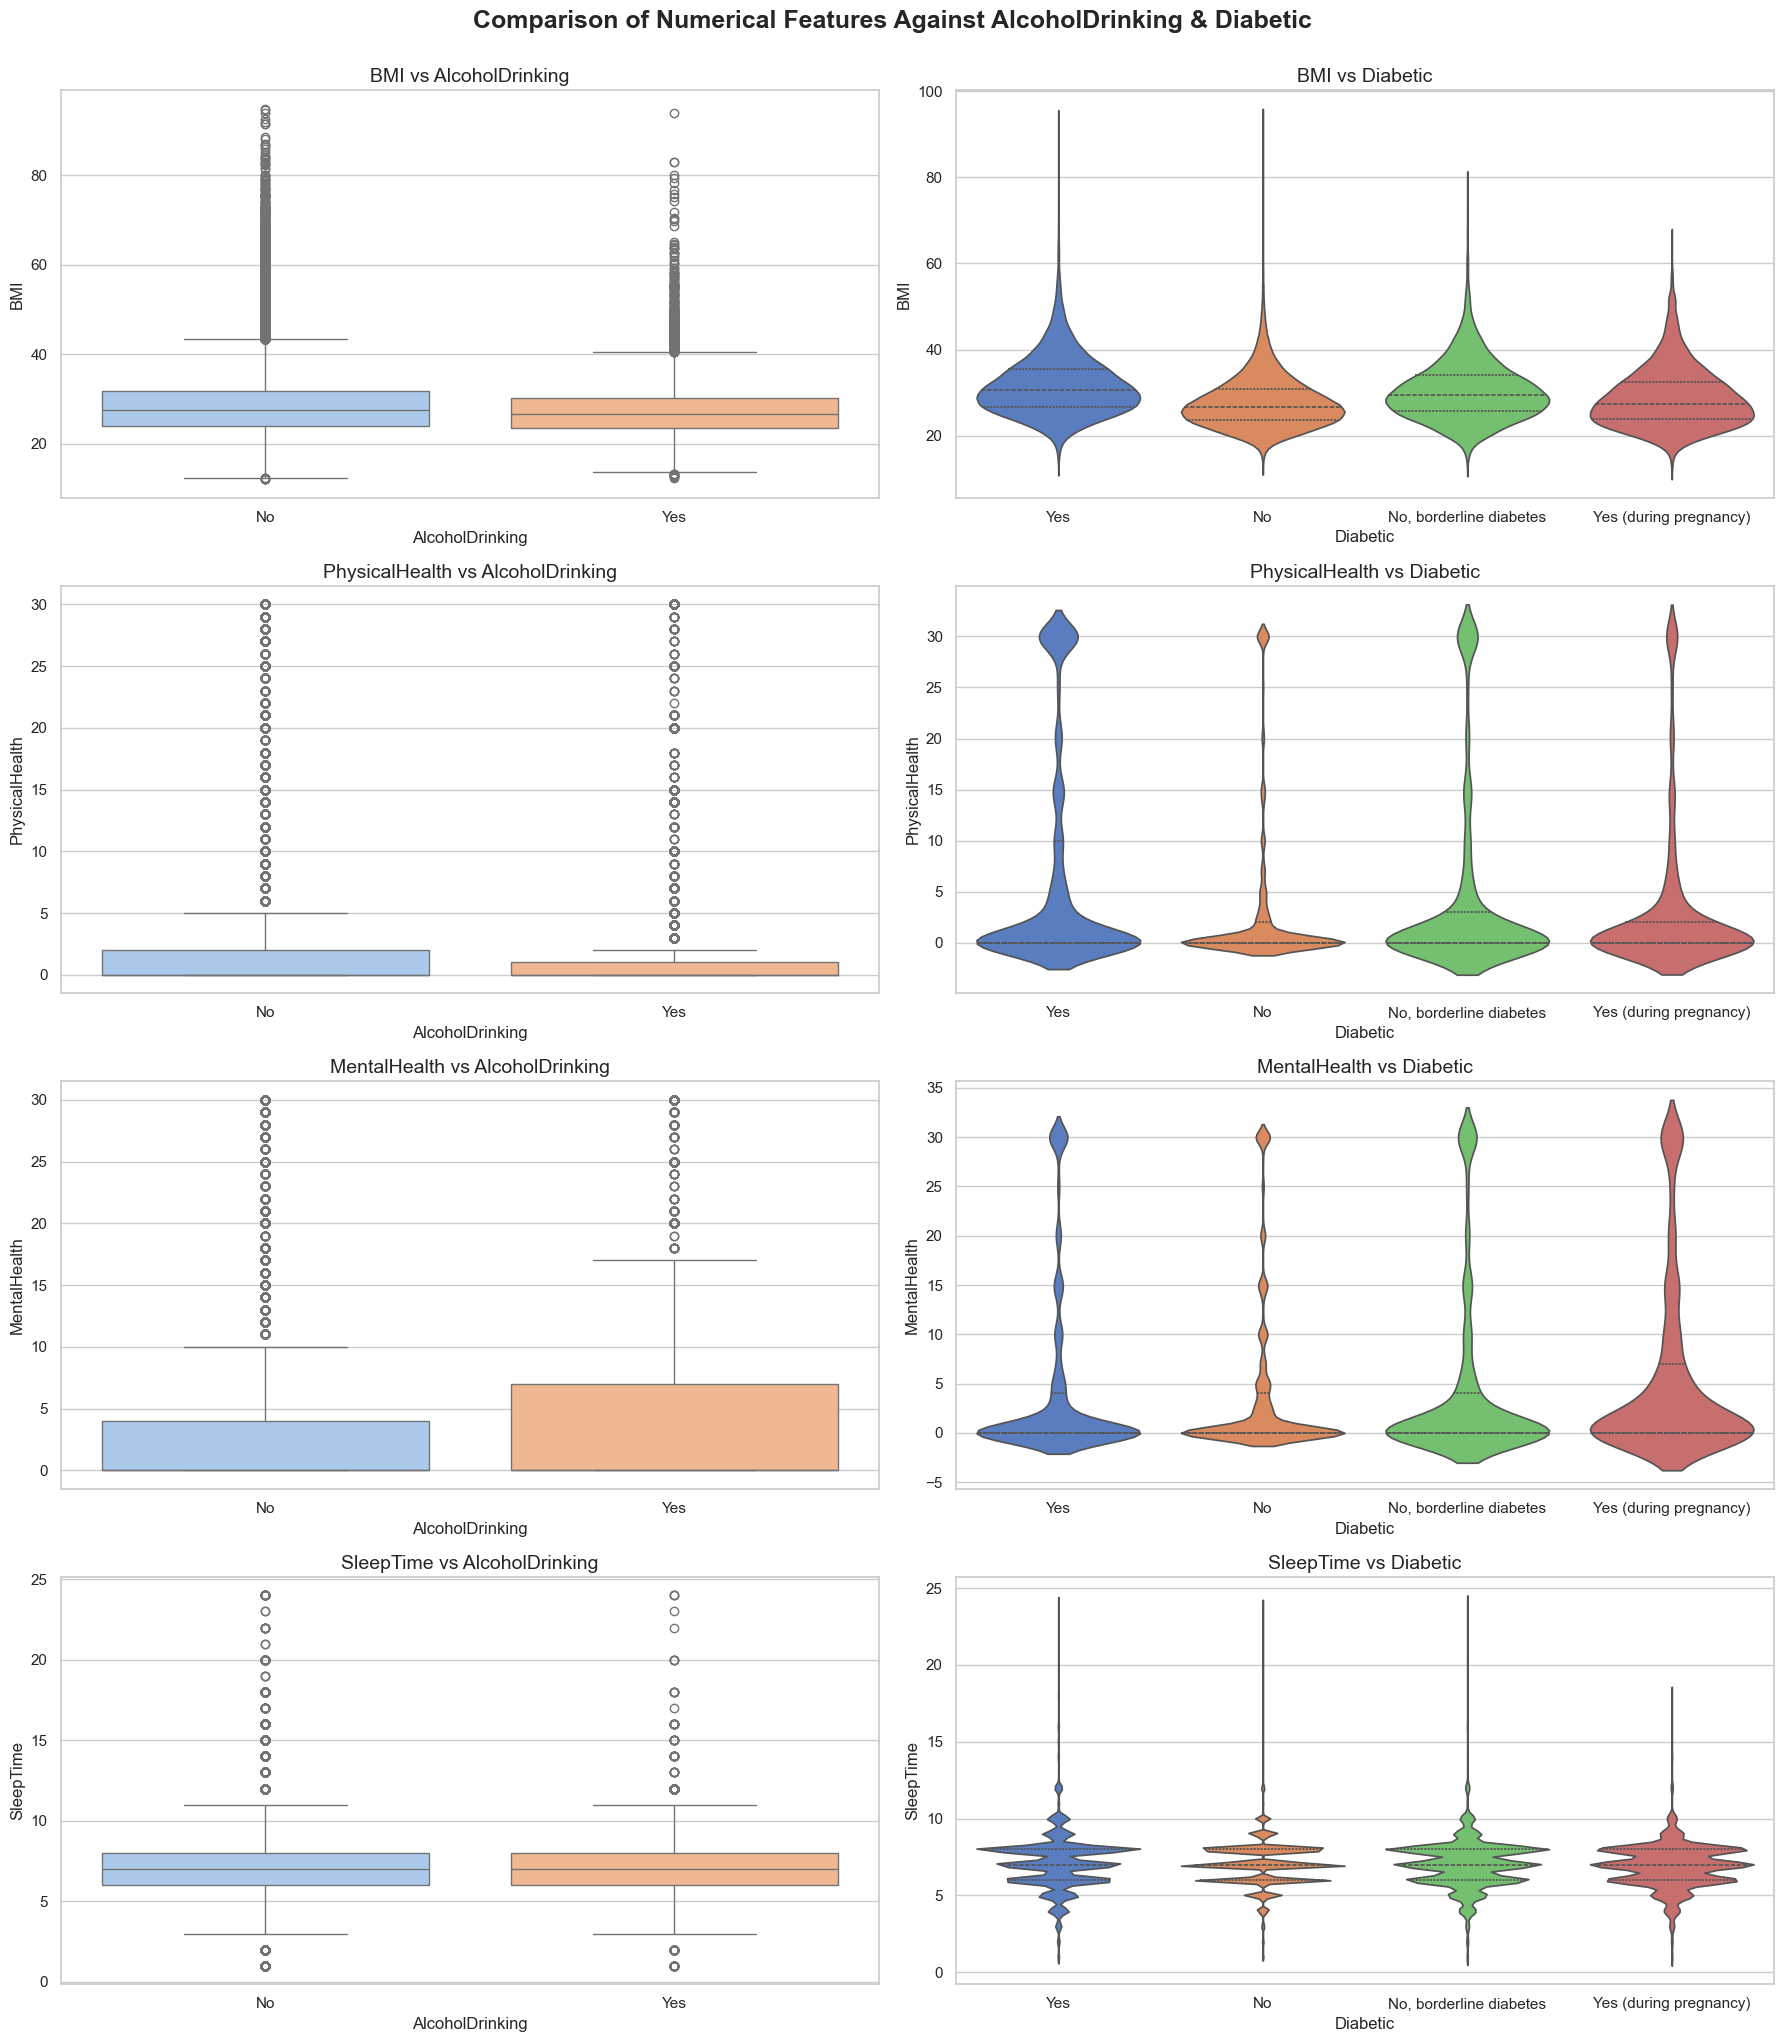

In [23]:
plt.figure(figsize=(18, len(numeric_features) * 5))  # Dynamic figure size

for i, feature in enumerate(numeric_features, 1):
    # Boxplot for AlcoholDrinking
    plt.subplot(len(numeric_features), 2, 2*i-1)
    sns.boxplot(y=df[feature], x=df['AlcoholDrinking'], palette='pastel')
    plt.title(f'{feature} vs AlcoholDrinking', fontsize=14)
    plt.xlabel("AlcoholDrinking", fontsize=12)
    plt.ylabel(feature, fontsize=12)

    # Violin plot for Diabetic (More informative than boxplot alone)
    plt.subplot(len(numeric_features), 2, 2*i)
    sns.violinplot(y=df[feature], x=df['Diabetic'], palette='muted', inner="quartile")
    plt.title(f'{feature} vs Diabetic', fontsize=14)
    plt.xlabel("Diabetic", fontsize=12)
    plt.ylabel(feature, fontsize=12)

plt.tight_layout()
plt.suptitle("Comparison of Numerical Features Against AlcoholDrinking & Diabetic", fontsize=18, fontweight='bold', y=1.02)
plt.show()

### From all the graphs presented, it can be concluded that alcohol consumption and smoking are not the main factors in heart disease, as scientists testify to this.

<a id="title-four"></a>
<h1 style='background:#4682B4; border:2; border-radius: 10px; color:white'><center>Handling Outliers</center></h1>

In [24]:
def remove_outliers_from_dataframe(df):
    
    for column in df.columns:
        if column in ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
        
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
        
            df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [25]:
# df=remove_outliers_from_dataframe(df)

In [26]:
bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')]  
labels = ['Underweight', 'Normal weight', 'Overweight', 'Obesity I', 'Obesity II', 'Obesity III']  

In [27]:
df['BMI_Category'] = pd.cut(df['BMI'], bins=bins, labels=labels, right=False)

In [28]:
df[['BMI', 'BMI_Category']].head(10)

BMI   BMI_Category
0  16.60    Underweight
1  20.34  Normal weight
2  26.58     Overweight
3  24.21  Normal weight
4  23.71  Normal weight
5  28.87     Overweight
6  21.63  Normal weight
7  31.64      Obesity I
8  26.45     Overweight
9  40.69    Obesity III

In [29]:
df['BMI_Category'].value_counts()

BMI_Category
Overweight       105680
Normal weight     88767
Obesity I         59852
Obesity II        25679
Obesity III       16656
Underweight        5083
Name: count, dtype: int64

/var/folders/lf/cj1l0kg94pxgnvq94k90_rz00000gn/T/ipykernel_1107/3202609849.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='BMI_Category', data=df_heart_disease, palette='Spectral')


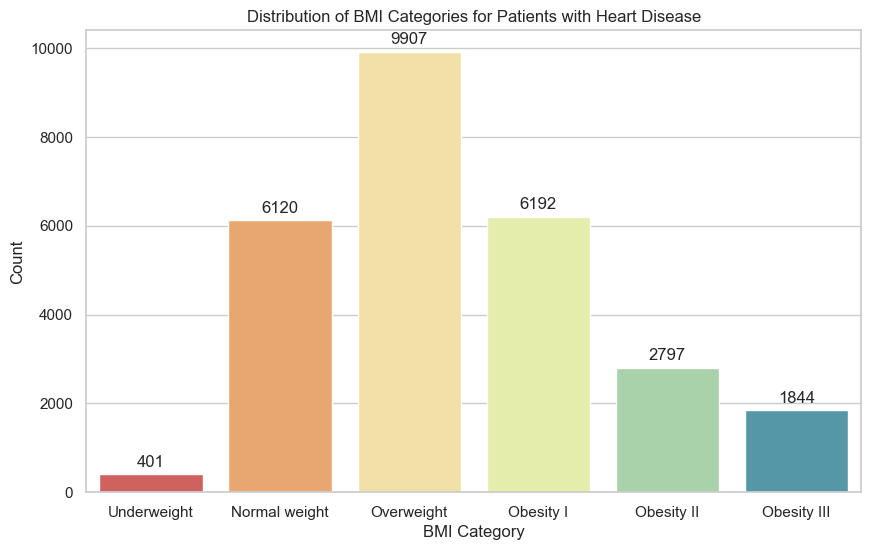

In [30]:
df_heart_disease = df[df['HeartDisease'] == 'Yes']

plt.figure(figsize=(10,6))
ax = sns.countplot(x='BMI_Category', data=df_heart_disease, palette='Spectral')  
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9),  
                textcoords='offset points')

plt.title('Distribution of BMI Categories for Patients with Heart Disease')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.show()

/var/folders/lf/cj1l0kg94pxgnvq94k90_rz00000gn/T/ipykernel_1107/1764042520.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='AgeCategory', data=df_heart_disease, palette='flare')


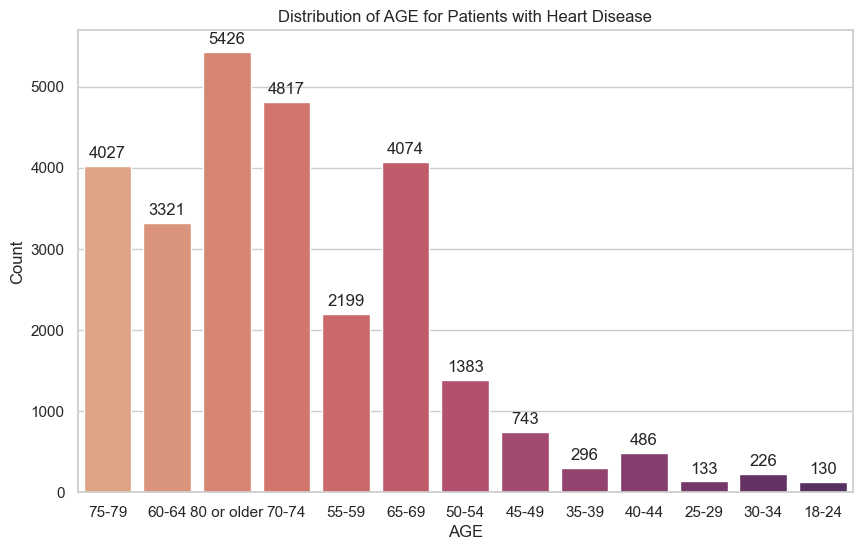

In [31]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='AgeCategory', data=df_heart_disease, palette='flare')  
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9),  
                textcoords='offset points')

plt.title('Distribution of AGE for Patients with Heart Disease')
plt.xlabel('AGE')
plt.ylabel('Count')
plt.show()

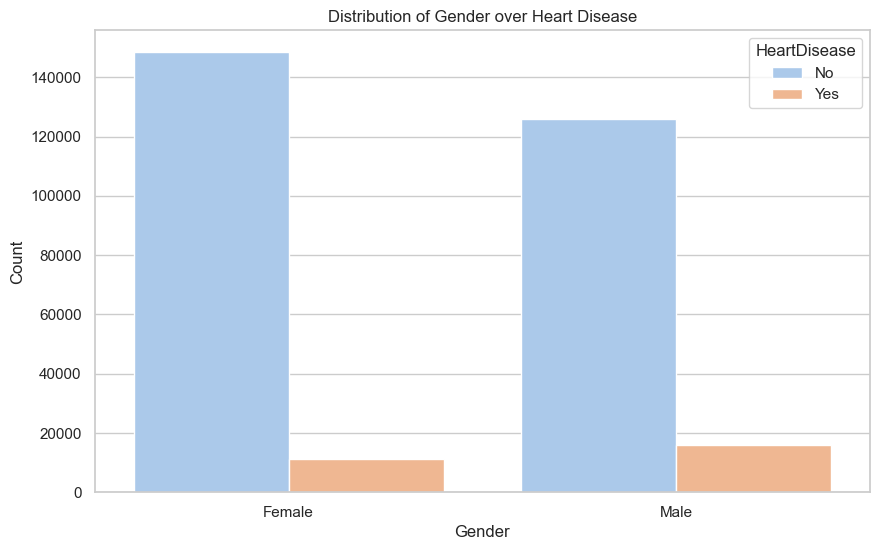

In [32]:
plt.figure(figsize=(10,6))
sns.countplot(x='Sex',hue='HeartDisease',data =df,palette='pastel')
plt.title('Distribution of Gender over Heart Disease')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

/var/folders/lf/cj1l0kg94pxgnvq94k90_rz00000gn/T/ipykernel_1107/1995689614.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='GenHealth', data=df_heart_disease, palette='ch:s=.25,rot=-.25')


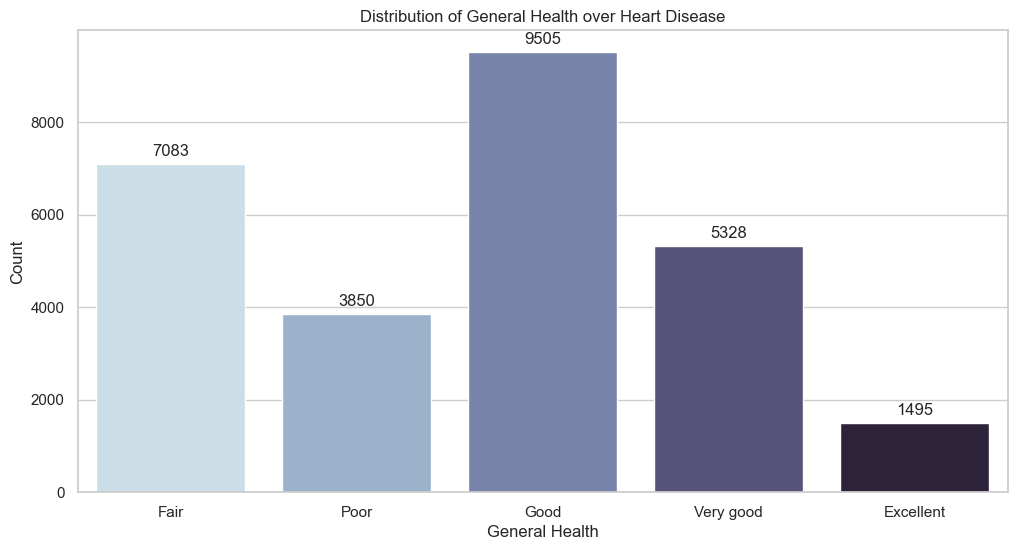

In [33]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='GenHealth', data=df_heart_disease, palette='ch:s=.25,rot=-.25') 
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9),  
                textcoords='offset points')
plt.title('Distribution of General Health over Heart Disease')
plt.xlabel('General Health')
plt.ylabel('Count')
plt.show()

/var/folders/lf/cj1l0kg94pxgnvq94k90_rz00000gn/T/ipykernel_1107/1985851542.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x= 'Race',data=df_heart_disease,palette='Set2')


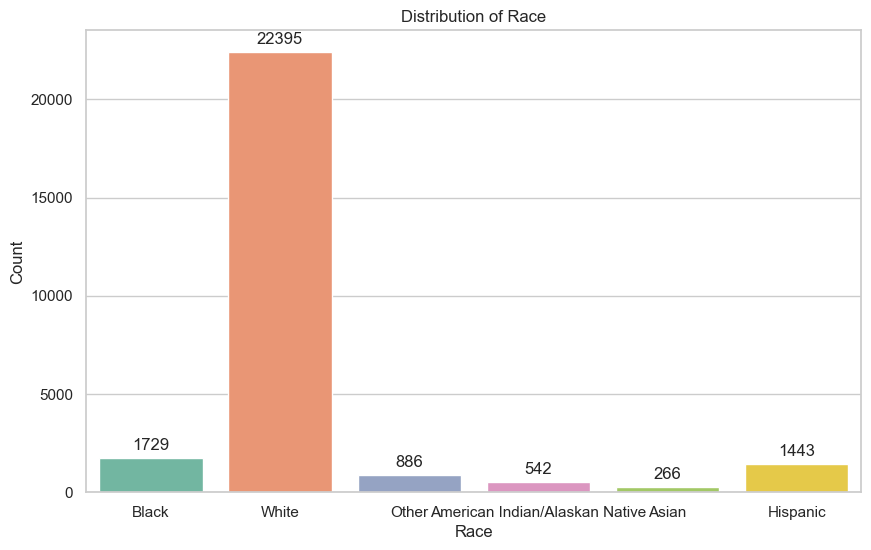

In [34]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x= 'Race',data=df_heart_disease,palette='Set2')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9),  
                textcoords='offset points')
plt.title('Distribution of Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

In [35]:
df['Diabetic'].value_counts()

Diabetic
No                         251796
Yes                         40589
No, borderline diabetes      6776
Yes (during pregnancy)       2556
Name: count, dtype: int64

In [36]:
df['Diabetic'] = df['Diabetic'].replace({
    'No, borderline diabetes': 'No',
    'Yes (during pregnancy)': 'Yes'
})

<!-- ## SLEEP TIME VS HEART DISEASE
# need to CHECK FOR spearman CORRELATION -->

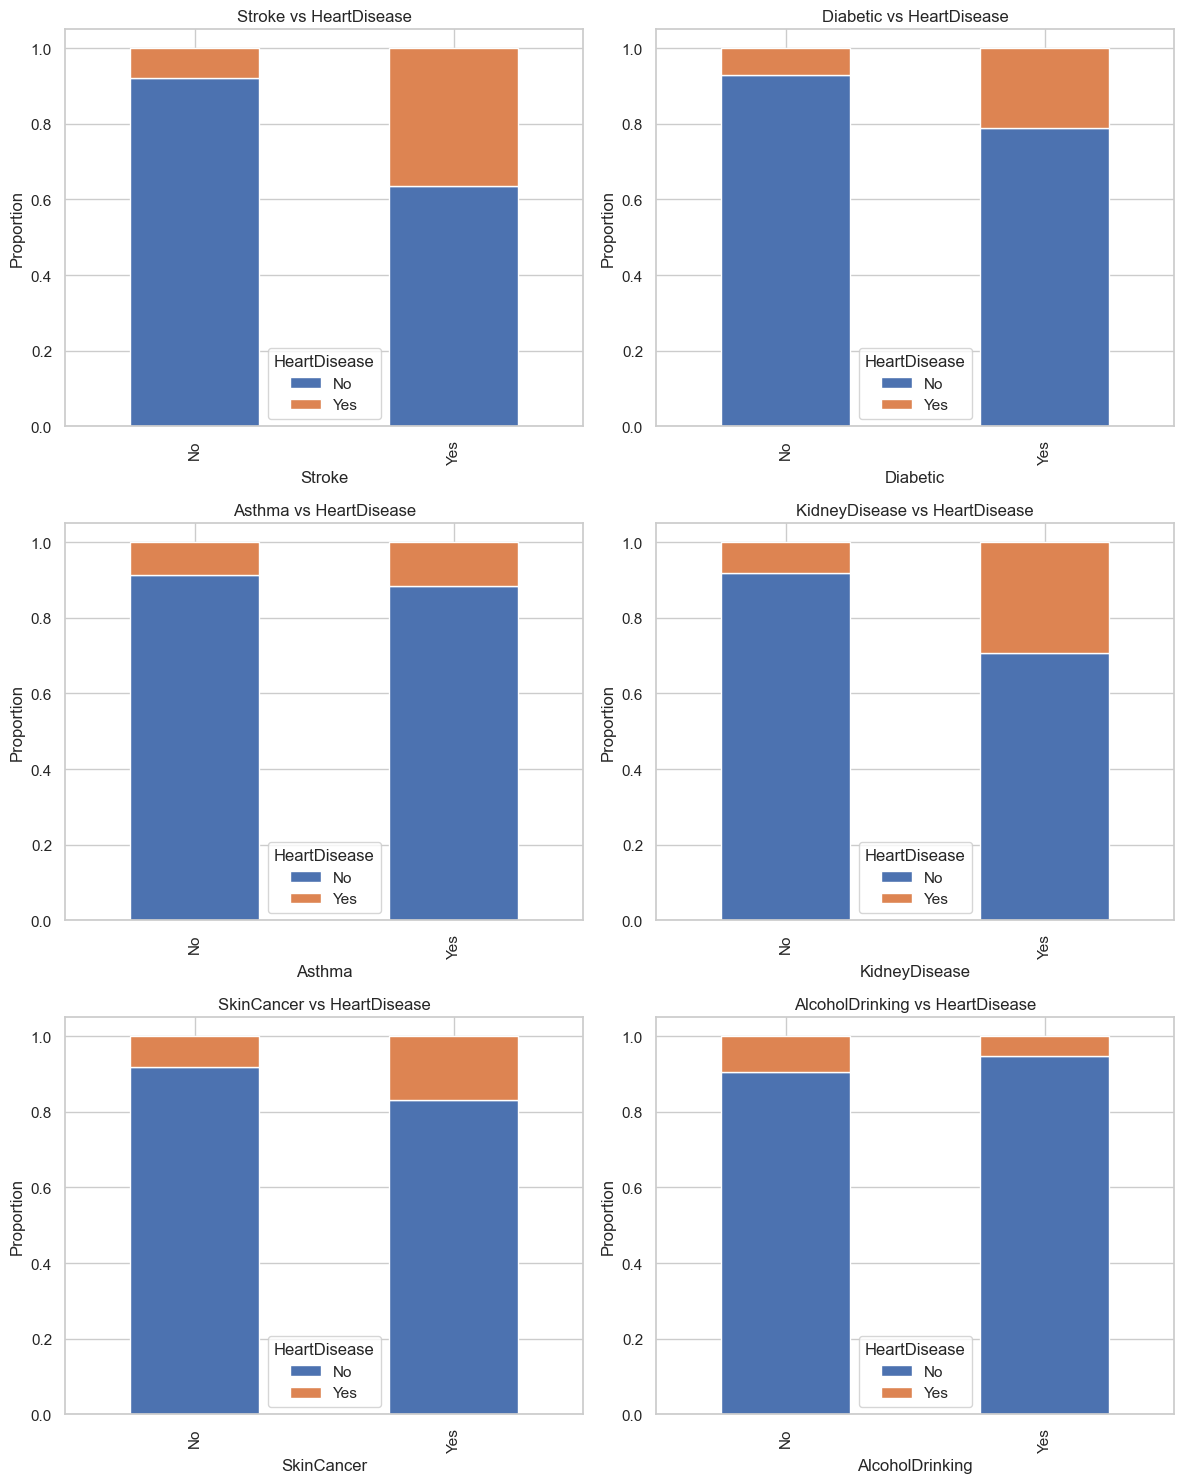

In [37]:
def stacked_bar(data, feature, target, ax):
    crosstab = pd.crosstab(data[feature], data[target], normalize='index')
    crosstab.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'{feature} vs {target}')
    ax.set_ylabel('Proportion')

# Set up the figure
fig, axes = plt.subplots(3, 2, figsize=(12, 15))

# Plot each feature
stacked_bar(df, 'Stroke', 'HeartDisease', axes[0, 0])
stacked_bar(df, 'Diabetic', 'HeartDisease', axes[0, 1])
stacked_bar(df, 'Asthma', 'HeartDisease', axes[1, 0])
stacked_bar(df, 'KidneyDisease', 'HeartDisease', axes[1, 1])
stacked_bar(df, 'SkinCancer', 'HeartDisease', axes[2, 0])
stacked_bar(df, 'AlcoholDrinking', 'HeartDisease', axes[2, 1])


# Adjust layout
plt.tight_layout()
plt.show()

In [38]:
df.head()

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  \
0              Yes  Very good        5.0    Yes            No        Yes   
1              Yes  Very good        7.0     No            No         No   
2              Yes       Fair        8.0    Yes            No         No   
3               No       Good        6.0     No            No        Yes   
4              Yes  Very good        8.0     No            No         No   

    BMI_Category  
0    Underweight  
1  Normal weight  
2     Overweight  
3  Normal weight  
4  Normal weight

In [39]:
df.describe().T.style.background_gradient(cmap='Blues')

/var/folders/lf/cj1l0kg94pxgnvq94k90_rz00000gn/T/ipykernel_1107/3197329964.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=values, palette=colors, ax=ax1)


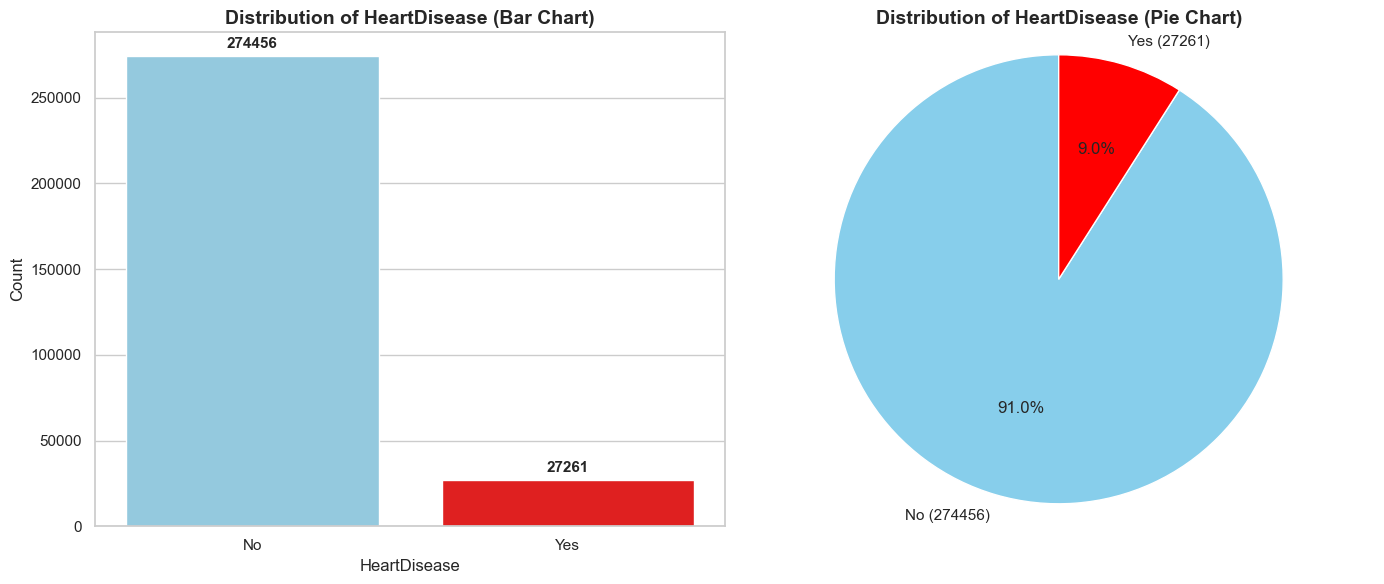

/var/folders/lf/cj1l0kg94pxgnvq94k90_rz00000gn/T/ipykernel_1107/3197329964.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=values, palette=colors, ax=ax1)


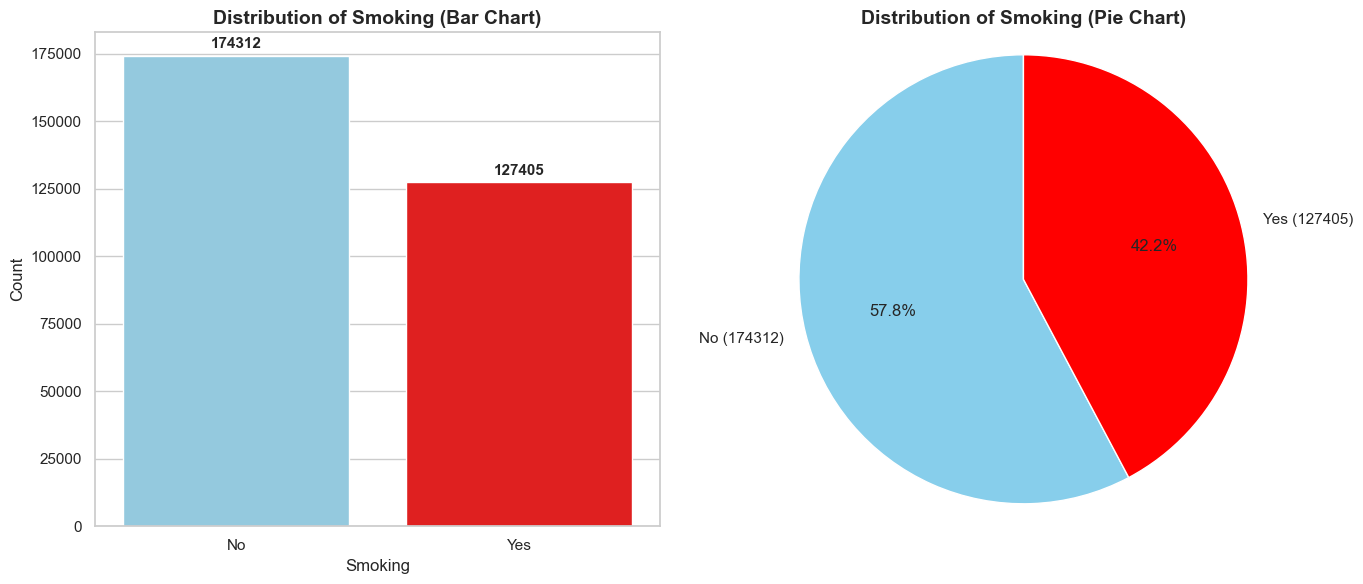

/var/folders/lf/cj1l0kg94pxgnvq94k90_rz00000gn/T/ipykernel_1107/3197329964.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=values, palette=colors, ax=ax1)


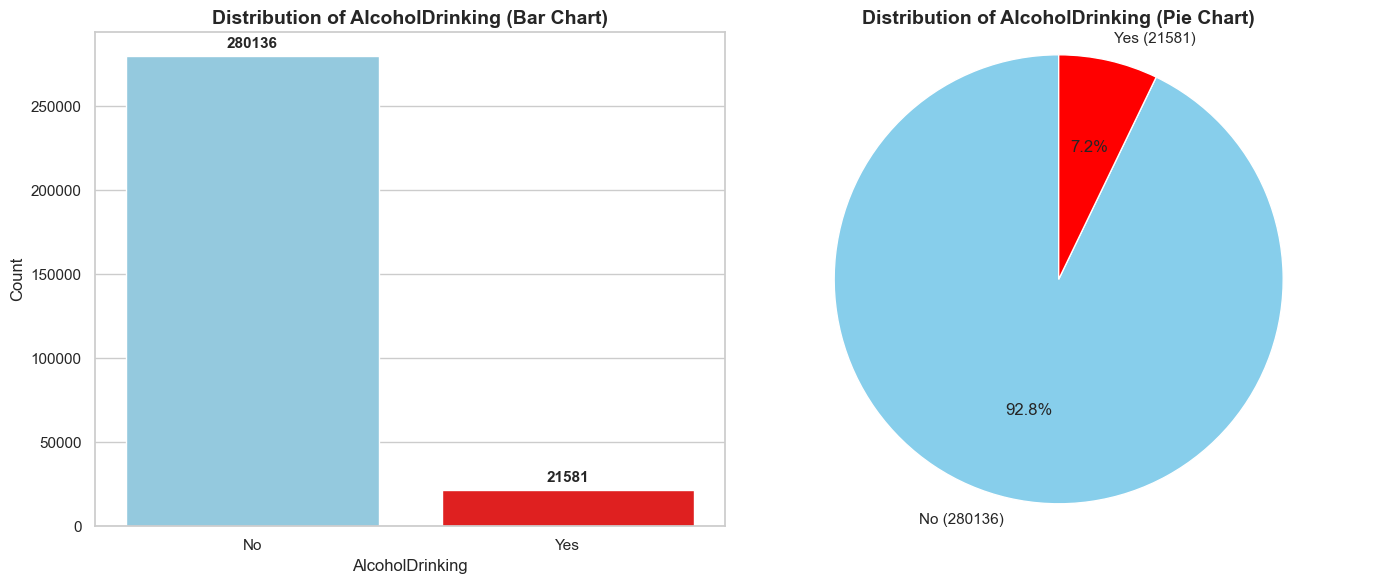

/var/folders/lf/cj1l0kg94pxgnvq94k90_rz00000gn/T/ipykernel_1107/3197329964.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=values, palette=colors, ax=ax1)


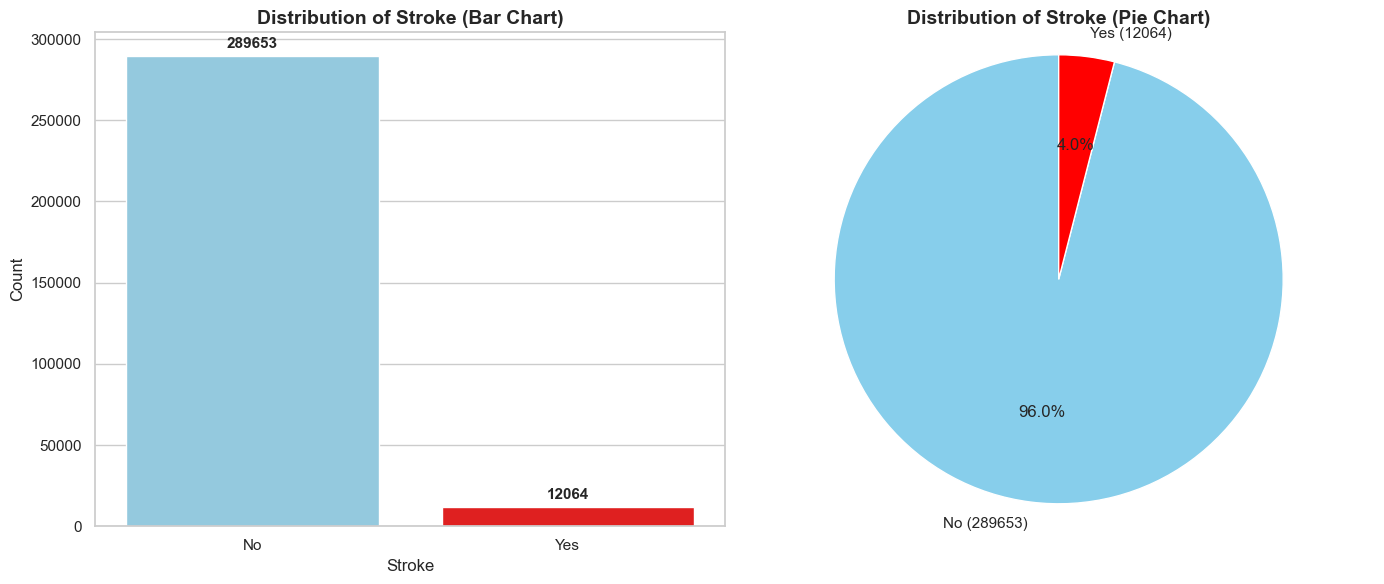

/var/folders/lf/cj1l0kg94pxgnvq94k90_rz00000gn/T/ipykernel_1107/3197329964.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=values, palette=colors, ax=ax1)


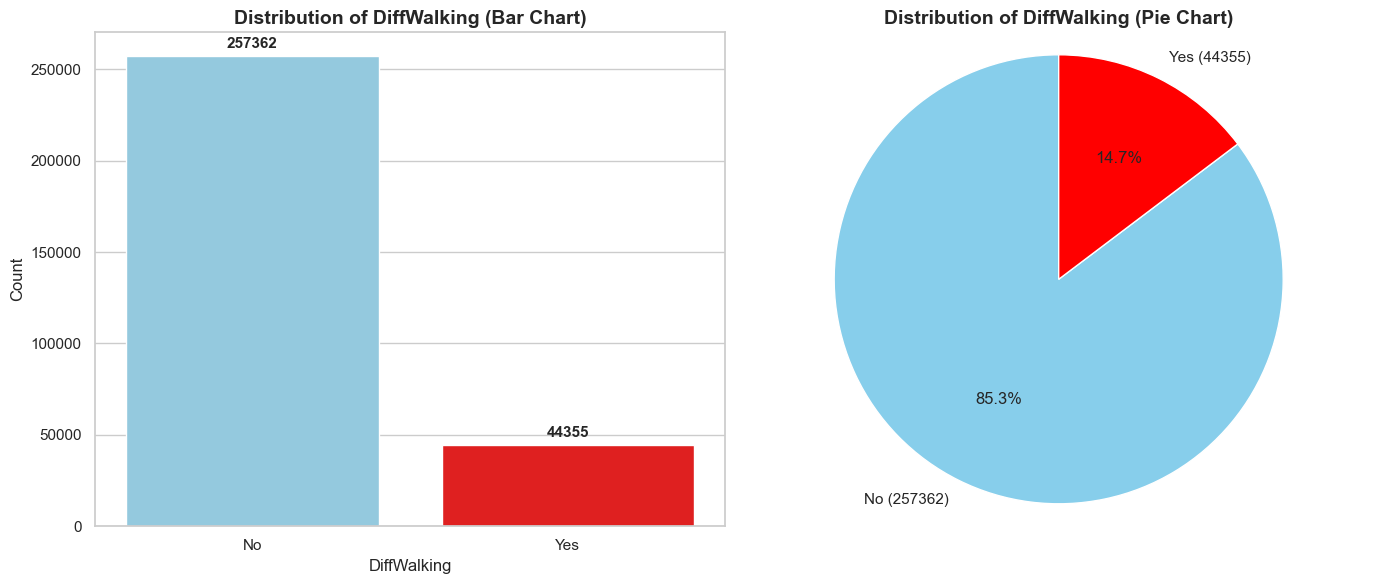

/var/folders/lf/cj1l0kg94pxgnvq94k90_rz00000gn/T/ipykernel_1107/3197329964.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=values, palette=colors, ax=ax1)


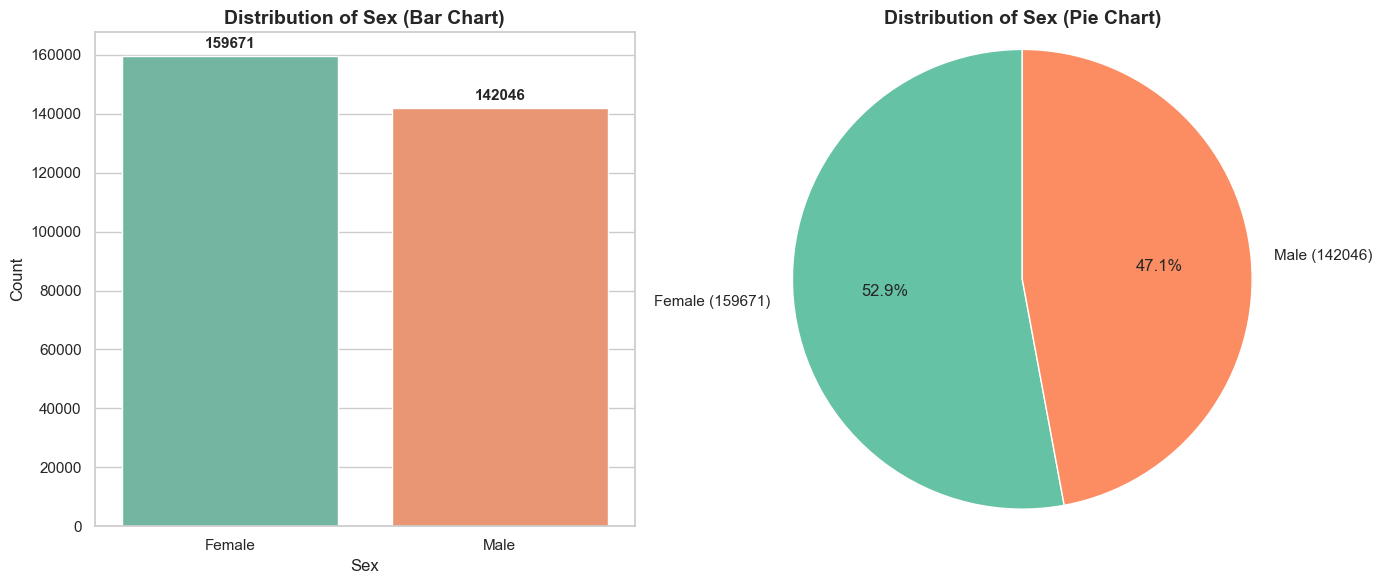

/var/folders/lf/cj1l0kg94pxgnvq94k90_rz00000gn/T/ipykernel_1107/3197329964.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=values, palette=colors, ax=ax1)


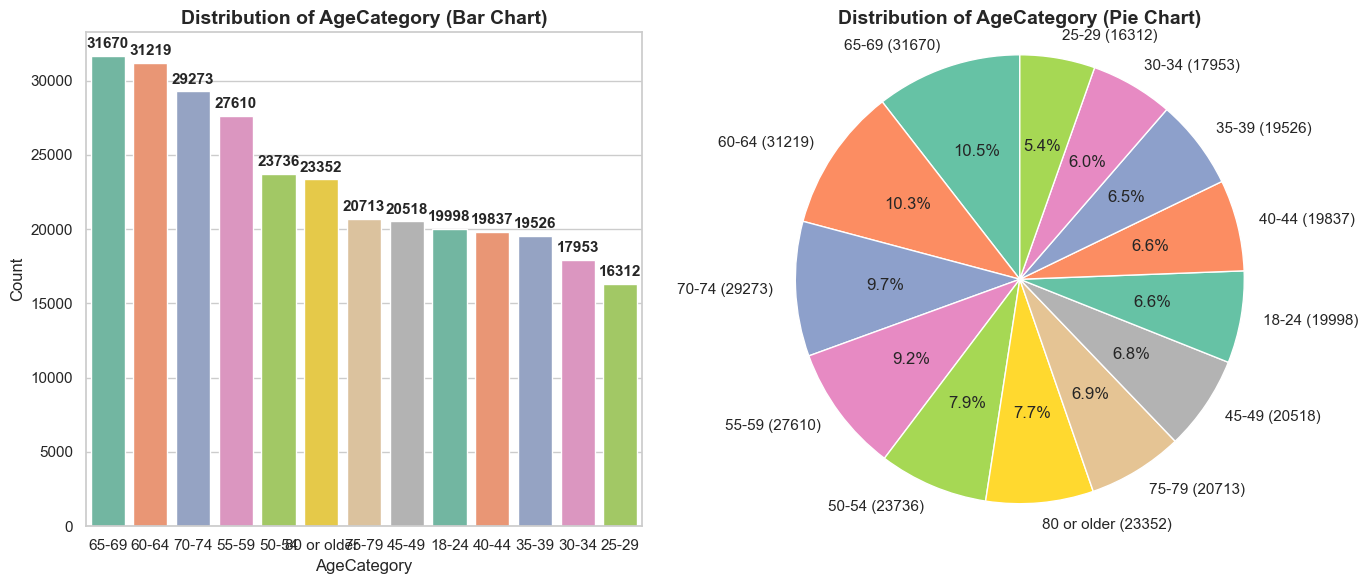

/var/folders/lf/cj1l0kg94pxgnvq94k90_rz00000gn/T/ipykernel_1107/3197329964.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=values, palette=colors, ax=ax1)


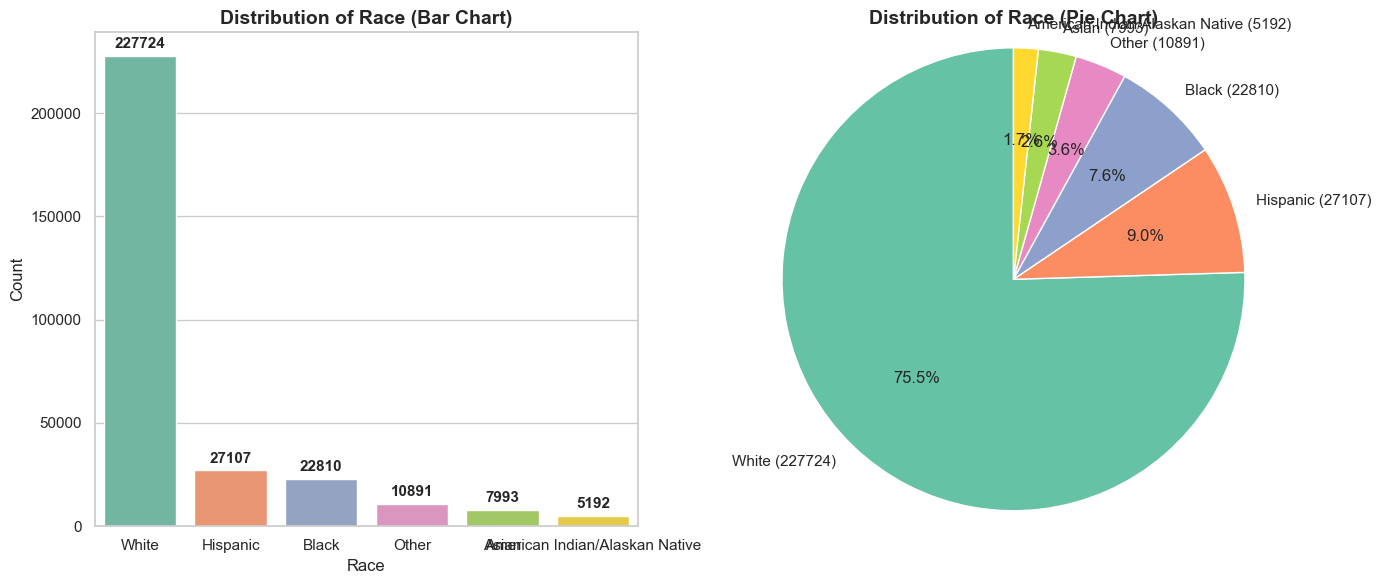

/var/folders/lf/cj1l0kg94pxgnvq94k90_rz00000gn/T/ipykernel_1107/3197329964.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=values, palette=colors, ax=ax1)


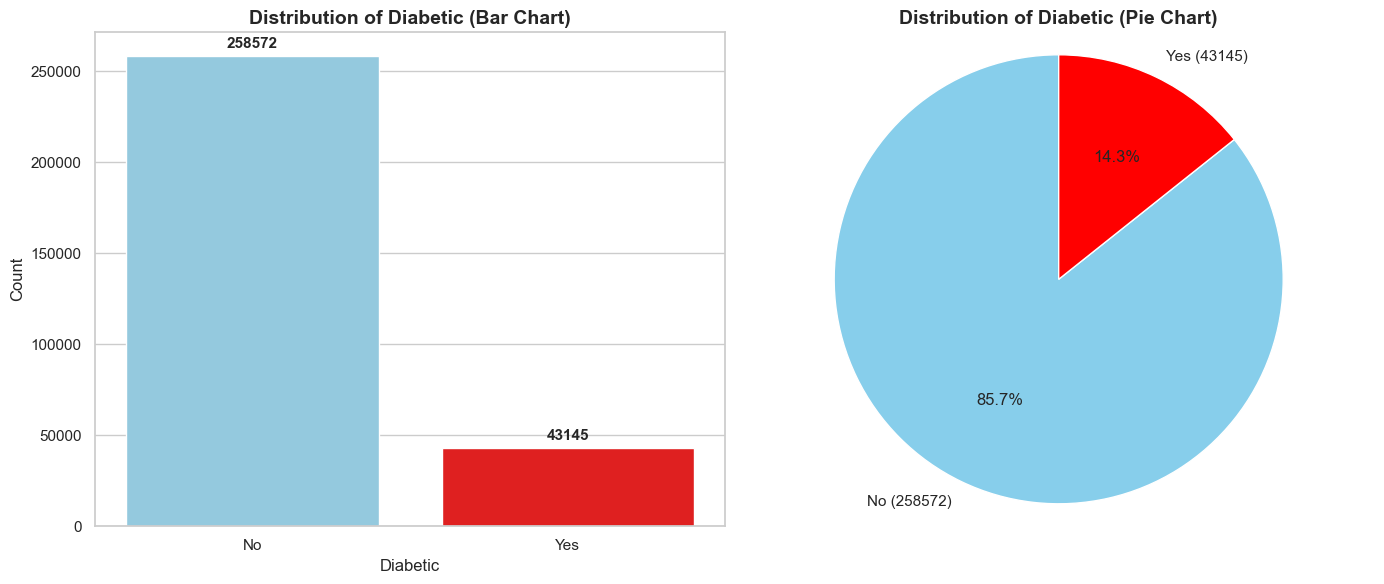

/var/folders/lf/cj1l0kg94pxgnvq94k90_rz00000gn/T/ipykernel_1107/3197329964.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=values, palette=colors, ax=ax1)


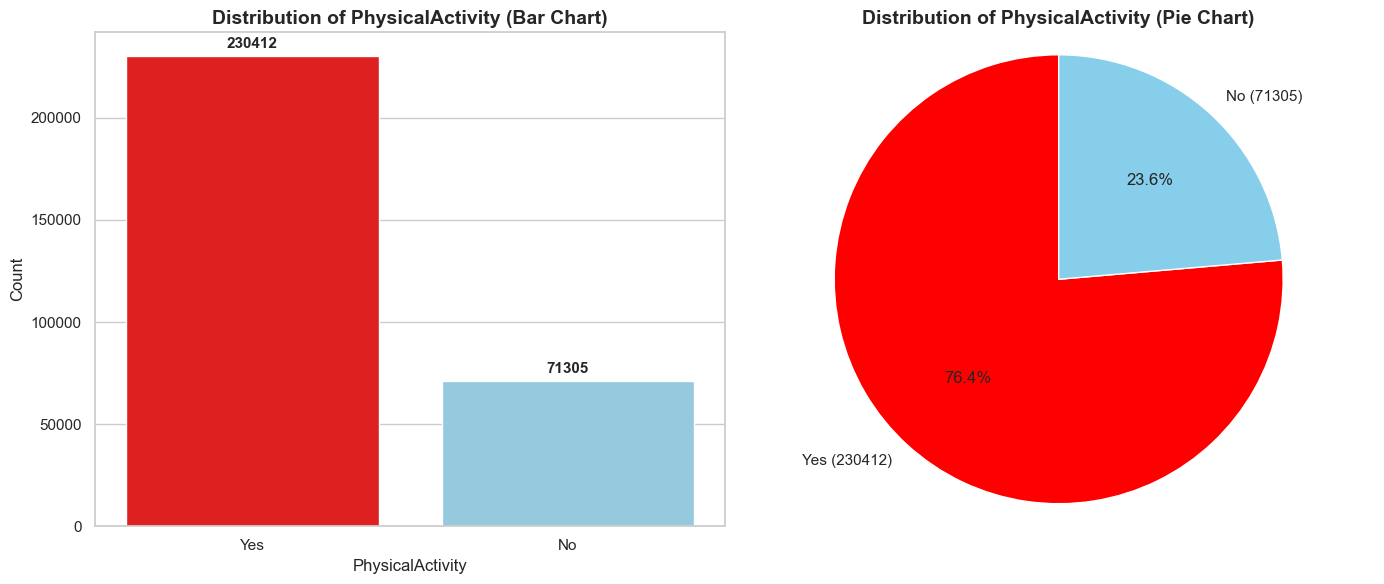

/var/folders/lf/cj1l0kg94pxgnvq94k90_rz00000gn/T/ipykernel_1107/3197329964.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=values, palette=colors, ax=ax1)


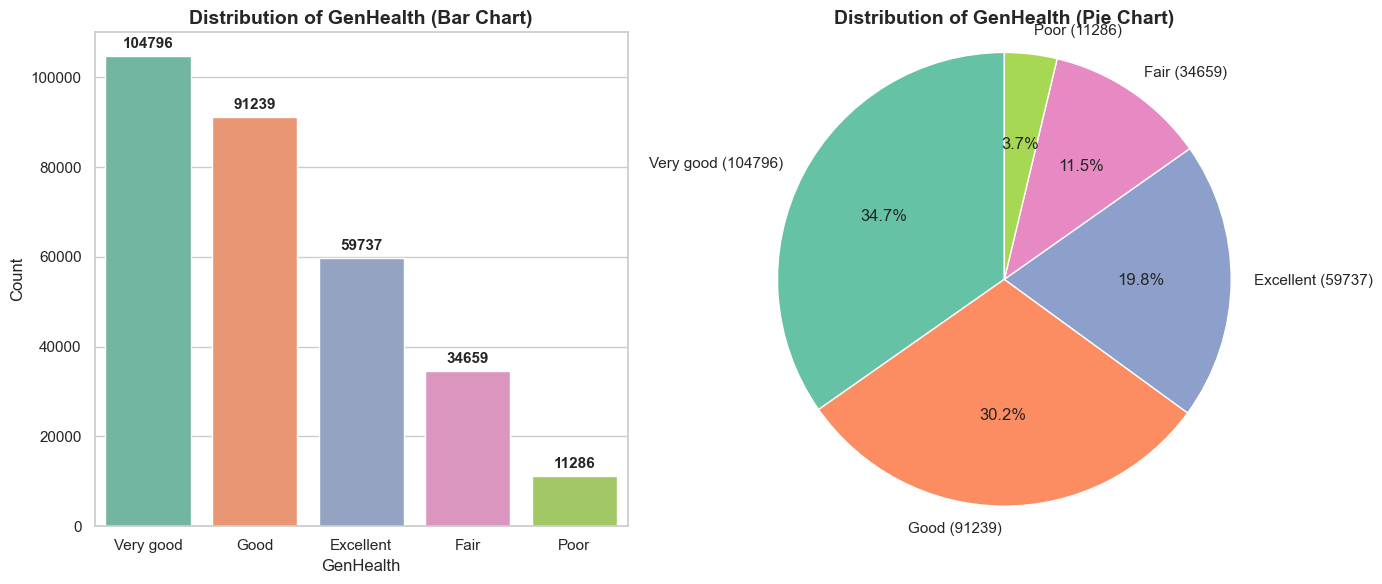

/var/folders/lf/cj1l0kg94pxgnvq94k90_rz00000gn/T/ipykernel_1107/3197329964.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=values, palette=colors, ax=ax1)


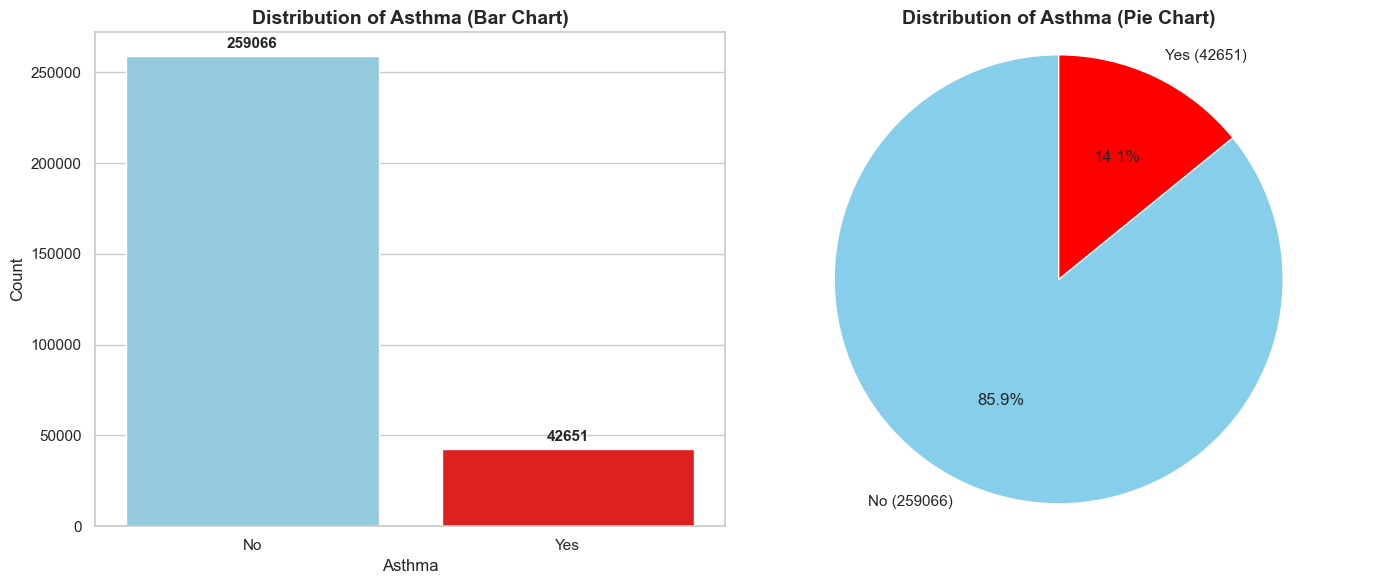

/var/folders/lf/cj1l0kg94pxgnvq94k90_rz00000gn/T/ipykernel_1107/3197329964.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=values, palette=colors, ax=ax1)


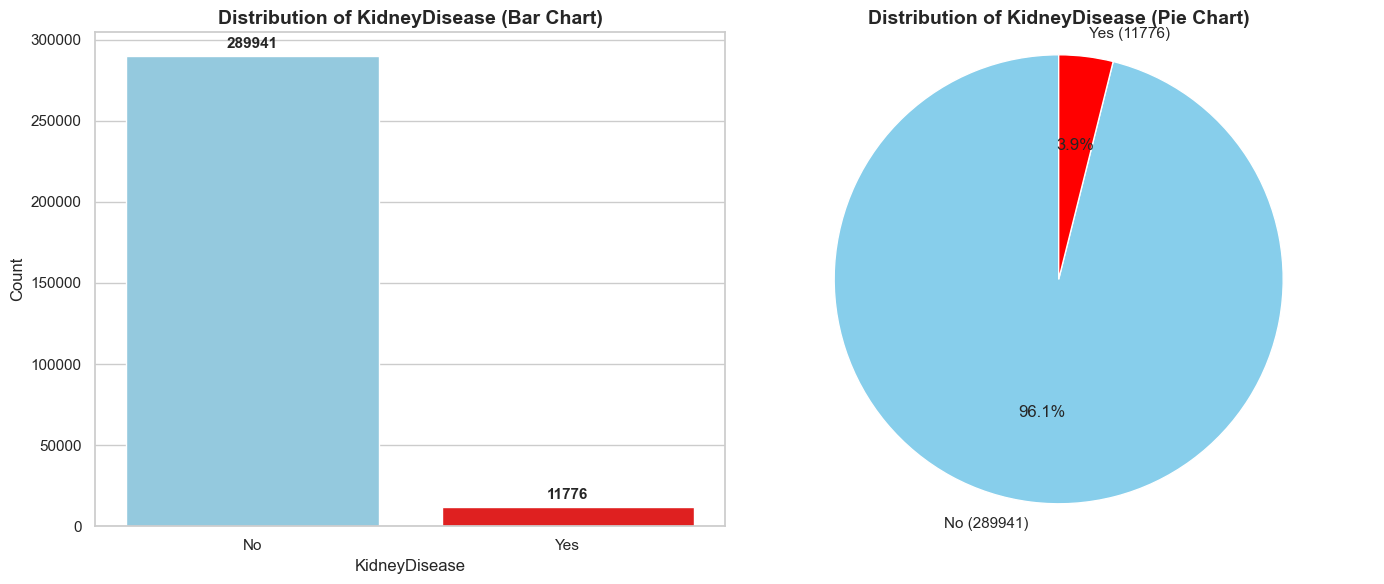

/var/folders/lf/cj1l0kg94pxgnvq94k90_rz00000gn/T/ipykernel_1107/3197329964.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=values, palette=colors, ax=ax1)


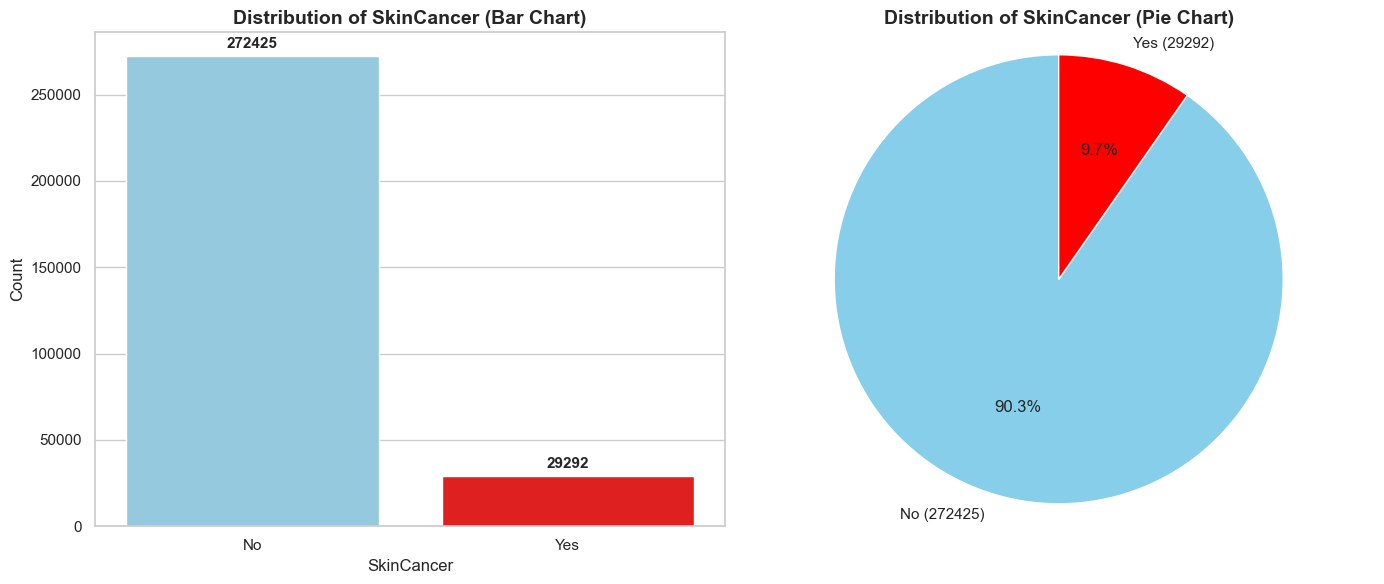

In [40]:
custom_colors = {'Yes': 'red', 'No': 'skyblue'}

# Loop through each categorical column
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    counts = df[column].value_counts()
    labels = counts.index.tolist()
    values = counts.values.tolist()
    
    # Use custom colors if only Yes/No, otherwise use Set2
    if set(labels) <= {'Yes', 'No'}:
        colors = [custom_colors[label] for label in labels]
    else:
        colors = sns.color_palette('Set2', len(labels))

    # Create figure with 1 row and 2 columns
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    
    # --- Bar Plot ---
    ax1 = axs[0]
    sns.barplot(x=labels, y=values, palette=colors, ax=ax1)
    ax1.set_title(f'Distribution of {column} (Bar Chart)', fontsize=14, fontweight='bold')
    ax1.set_xlabel(column, fontsize=12)
    ax1.set_ylabel('Count', fontsize=12)
    
    # Add count labels
    for i, count in enumerate(values):
        ax1.text(i, count + max(values) * 0.01, str(count),
                 ha='center', va='bottom', fontsize=11, fontweight='bold')

    # --- Pie Chart ---
    ax2 = axs[1]
    ax2.pie(values,
            labels=[f'{label} ({count})' for label, count in zip(labels, values)],
            autopct='%1.1f%%',
            startangle=90,
            colors=colors)
    ax2.set_title(f'Distribution of {column} (Pie Chart)', fontsize=14, fontweight='bold')
    ax2.axis('equal')

    plt.tight_layout()
    plt.show()

## lets build a correlation table 

In [41]:
df.replace({'Yes': 1, 'No': 0}, inplace=True)  # Convert "Yes/No" to 1/0

# Compute correlation again
correlation = df.corr(numeric_only=True)
print(correlation['HeartDisease'].sort_values(ascending=False), '\n')

HeartDisease        1.000000
DiffWalking         0.196420
Stroke              0.194665
Diabetic            0.170331
PhysicalHealth      0.165235
KidneyDisease       0.142672
Smoking             0.104524
SkinCancer          0.090644
BMI                 0.047260
Asthma              0.035784
MentalHealth        0.020913
SleepTime           0.010834
AlcoholDrinking    -0.036289
PhysicalActivity   -0.093597
Name: HeartDisease, dtype: float64 



In [42]:
# df_corr.head()

Index(['HeartDisease', 'DiffWalking', 'Stroke', 'GenHealth_Poor', 'Diabetic',
       'PhysicalHealth', 'AgeCategory_80 or older', 'GenHealth_Fair',
       'KidneyDisease', 'Smoking', 'GenHealth_Very good', 'AgeCategory_75-79',
       'PhysicalActivity', 'SkinCancer', 'AgeCategory_70-74', 'Sex_Male',
       'AgeCategory_35-39', 'AgeCategory_25-29'],
      dtype='object')


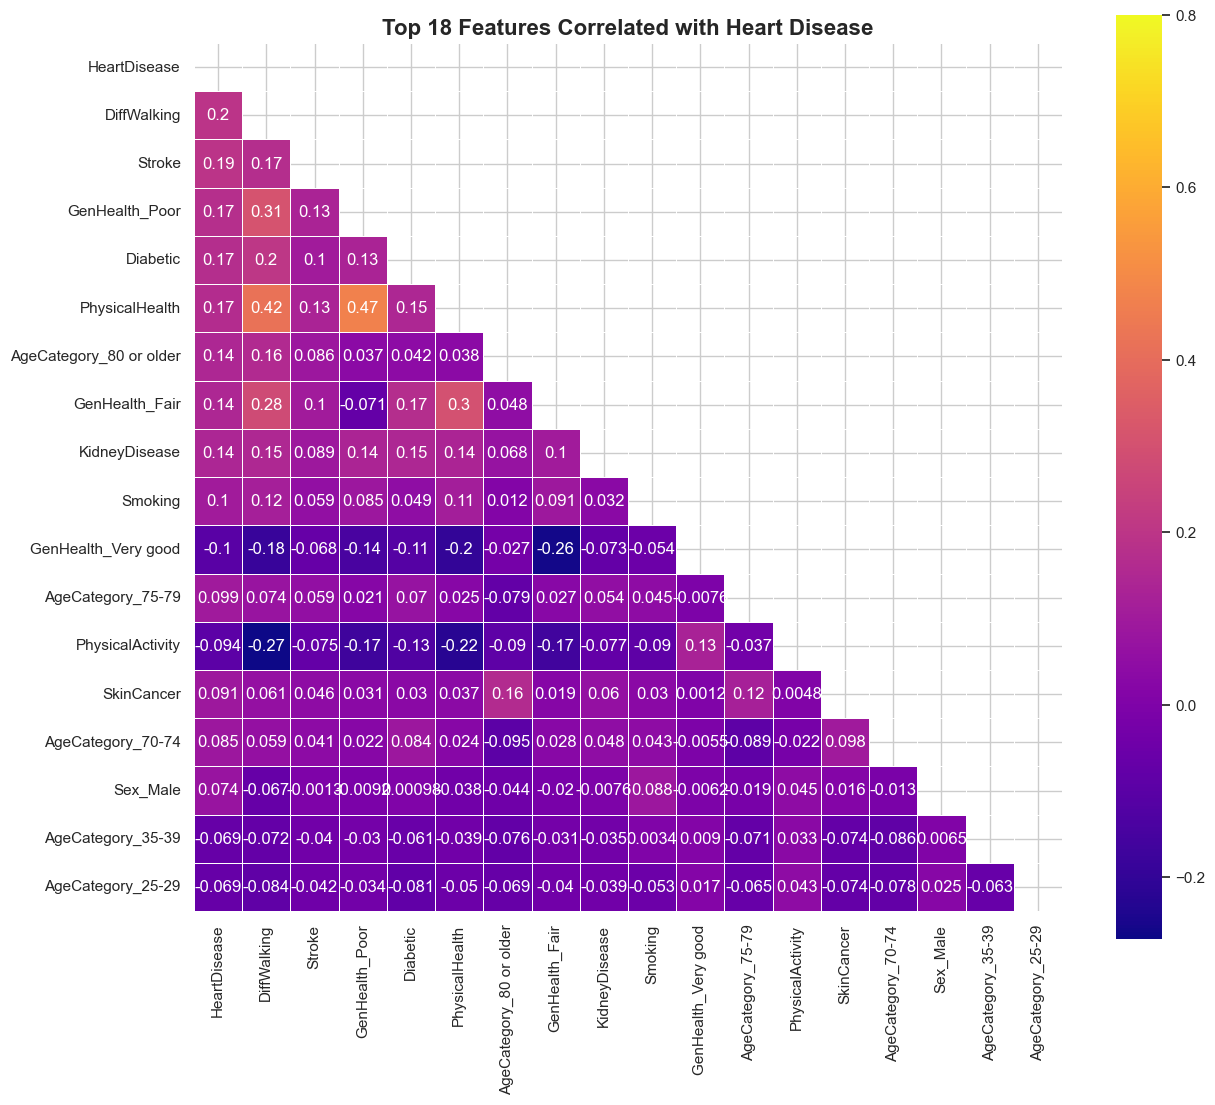

In [43]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Encode categorical variables and ensure numerical consistency
# Convert categorical features to numeric
df_encoded = pd.get_dummies(df, drop_first=True) 
# Ensure all columns are numeric
df_encoded = df_encoded.apply(pd.to_numeric, errors='coerce') 
# Drop rows with NaN values
df_encoded.dropna(inplace=True)

# Compute correlation matrix
correlation = df_encoded.corr()

# Select top k features most correlated with 'HeartDisease'
k = 18
if 'HeartDisease' in correlation.columns:
    cols = correlation['HeartDisease'].abs().nlargest(k).index  # Use absolute correlation values
    print(cols)
else:
    raise ValueError("HeartDisease column not found in correlation matrix!")

# Compute correlation matrix for selected features
cm = df_encoded[cols].corr()

# Create an upper triangular mask to avoid duplicate values
mask = np.triu(np.ones_like(cm, dtype=bool))

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(cm, mask=mask, vmax=.8, linewidths=0.5, square=True, annot=True, cmap='plasma',
            linecolor="white", xticklabels=cols, yticklabels=cols, annot_kws={'size':12})

plt.title("Top 18 Features Correlated with Heart Disease", fontsize=16, fontweight='bold')
plt.show()


In [44]:
df.head()

HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0             0  16.60        1                0       0             3.0   
1             0  20.34        0                0       1             0.0   
2             0  26.58        1                0       0            20.0   
3             0  24.21        0                0       0             0.0   
4             0  23.71        0                0       0            28.0   

   MentalHealth  DiffWalking     Sex  AgeCategory   Race  Diabetic  \
0          30.0            0  Female        55-59  White         1   
1           0.0            0  Female  80 or older  White         0   
2          30.0            0    Male        65-69  White         1   
3           0.0            0  Female        75-79  White         0   
4           0.0            1  Female        40-44  White         0   

   PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  \
0                 1  Very good        5.0       1              0           1   
1                 1  Very good        7.0       0              0           0   
2                 1       Fair        8.0       1              0           0   
3                 0       Good        6.0       0              0           1   
4                 1  Very good        8.0       0              0           0   

    BMI_Category  
0    Underweight  
1  Normal weight  
2     Overweight  
3  Normal weight  
4  Normal weight

In [45]:
# df['Sex'] = df['Sex'].map({'Male': True, 'Female': False})

<a id="title-five"></a>
<h1 style='background:#4682B4; border:2; border-radius: 10px; color:black'><center>Statistical Test</center></h1>

#### Since, I am planning to use Ordinal Encoder(which basically transform categorical variable into numerical variables eg ["Poor", "Average", "Good"] → [0, 1, 2]). To convert categorical data into numerical representation while maintaining their relative order, we shall using OrdinalEncoder. 

In [46]:

from sklearn.preprocessing import OrdinalEncoder

# checks categorical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# checks and apply OrdinalEncoder
encoder = OrdinalEncoder()
df_copy = df.copy() 
df_copy[categorical_features] = encoder.fit_transform(df_copy[categorical_features])

print("Categorical variables successfully encoded.")


Categorical variables successfully encoded.


## Kolmogorov Simrnov (K-S test)

##### K-S test checks if the given sample follows the certain distribution or not. For our case I am going to perform Normal Distribution test using K-S method. Since K-S test can handle large datasets I am choosing this over other test like Shapiro-Wilk Test, Anderson-Darling Test``

##### K-S test checks if the given sample follows the certain distribution or not. For our case I am going to perform Normal Distribution test using K-S method. Since K-S test can handle large datasets I am choosing this over other test like Shapiro-Wilk Test, Anderson-Darling Test

##### If we get the p-value which is less than 0.05 (p-value <0.05) we reject thhe Null hypothesis which suggest that it does not follow normal distributions

In [47]:
df_copy

HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0                  0  16.60        1                0       0             3.0   
1                  0  20.34        0                0       1             0.0   
2                  0  26.58        1                0       0            20.0   
3                  0  24.21        0                0       0             0.0   
4                  0  23.71        0                0       0            28.0   
...              ...    ...      ...              ...     ...             ...   
319790             1  27.41        1                0       0             7.0   
319791             0  29.84        1                0       0             0.0   
319792             0  24.24        0                0       0             0.0   
319793             0  32.81        0                0       0             0.0   
319794             0  46.56        0                0       0             0.0   

        MentalHealth  DiffWalking  Sex  AgeCategory  Race  Diabetic  \
0               30.0            0  0.0          7.0   5.0         1   
1                0.0            0  0.0         12.0   5.0         0   
2               30.0            0  1.0          9.0   5.0         1   
3                0.0            0  0.0         11.0   5.0         0   
4                0.0            1  0.0          4.0   5.0         0   
...              ...          ...  ...          ...   ...       ...   
319790           0.0            1  1.0          8.0   3.0         1   
319791           0.0            0  1.0          3.0   3.0         0   
319792           0.0            0  0.0          5.0   3.0         0   
319793           0.0            0  0.0          1.0   3.0         0   
319794           0.0            0  0.0         12.0   3.0         0   

        PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  \
0                      1        4.0        5.0       1              0   
1                      1        4.0        7.0       0              0   
2                      1        1.0        8.0       1              0   
3                      0        2.0        6.0       0              0   
4                      1        4.0        8.0       0              0   
...                  ...        ...        ...     ...            ...   
319790                 0        1.0        6.0       1              0   
319791                 1        4.0        5.0       1              0   
319792                 1        2.0        6.0       0              0   
319793                 0        2.0       12.0       0              0   
319794                 1        2.0        8.0       0              0   

        SkinCancer   BMI_Category  
0                1    Underweight  
1                0  Normal weight  
2                0     Overweight  
3                1  Normal weight  
4                0  Normal weight  
...            ...            ...  
319790           0     Overweight  
319791           0     Overweight  
319792           0  Normal weight  
319793           0      Obesity I  
319794           0    Obesity III  

[301717 rows x 19 columns]

In [48]:
# from scipy.stats import kstest, zscore
# import pandas as pd
# import numpy as np

# # Automatically select numerical columns
# numerical_cols = df_copy.select_dtypes(include=['float64', 'int64']).columns

# # Ensure all columns are numeric
# df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')

# # Normalize data using z-score
# df_normalized = df[numerical_cols].apply(zscore)

# # Perform Kolmogorov-Smirnov test
# ks_test_results = {}
# for col in numerical_cols:
#     col_data = df_normalized[col].dropna()
#     if len(col_data) > 0:
#         statistic, p_value = kstest(col_data, 'norm')
#         ks_test_results[col] = {'KS Statistic': statistic, 'p-value': p_value}
#     else:
#         ks_test_results[col] = {'KS Statistic': np.nan, 'p-value': np.nan}

# # Show results
# ks_df = pd.DataFrame(ks_test_results).T
# print(ks_df)


In [49]:
from scipy.stats import ks_1samp, norm

# Identify numerical features
numerical_features = df_copy.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Perform Kolmogorov-Smirnov test for normality
for feature in numerical_features:
    ks_stat, p_value = ks_1samp(df_copy[feature], norm.cdf)
    
    print(f"{feature}: KS Statistic={ks_stat:.5f}, p-value={p_value:.5f}")
    
    if p_value < 0.05:
        print(f"{feature}: Sample does not look Gaussian (Reject H0)")
    else:
        print(f"{feature}: Sample looks Gaussian (Fail to reject H0)")
        

HeartDisease: KS Statistic=0.50000, p-value=0.00000
HeartDisease: Sample does not look Gaussian (Reject H0)
BMI: KS Statistic=1.00000, p-value=0.00000
BMI: Sample does not look Gaussian (Reject H0)
Smoking: KS Statistic=0.50000, p-value=0.00000
Smoking: Sample does not look Gaussian (Reject H0)
AlcoholDrinking: KS Statistic=0.50000, p-value=0.00000
AlcoholDrinking: Sample does not look Gaussian (Reject H0)
Stroke: KS Statistic=0.50000, p-value=0.00000
Stroke: Sample does not look Gaussian (Reject H0)
PhysicalHealth: KS Statistic=0.50000, p-value=0.00000
PhysicalHealth: Sample does not look Gaussian (Reject H0)
MentalHealth: KS Statistic=0.50000, p-value=0.00000
MentalHealth: Sample does not look Gaussian (Reject H0)
DiffWalking: KS Statistic=0.50000, p-value=0.00000
DiffWalking: Sample does not look Gaussian (Reject H0)
Sex: KS Statistic=0.50000, p-value=0.00000
Sex: Sample does not look Gaussian (Reject H0)
AgeCategory: KS Statistic=0.85691, p-value=0.00000
AgeCategory: Sample does no

## Pearson Chi-Square Test

### Since we have some categorical variables in the dataset, Pearson's Chi-Square Test is really helpful to examine and understand the relation between categorical variables and our target fearture (HeartDisease). The purpose of this test is to find if two categorical variables are independent or dependent. Further, lets set the hypothesis for our test.

## Hypotheses

### Null Hypothesis (H₀): No relationship exists between the categorical feature and the target variable.

###  Alternative Hypothesis (H₁): A significant relationship exists between the categorical feature and the target variable.

### If p-value < 0.05, we reject H₀, meaning the variables are dependent (correlated).

In [50]:
from scipy.stats import chi2_contingency

target_feature = 'HeartDisease'

# Perform Chi-Square Test on categorical features
for feature in categorical_features:
    if feature != target_feature:
        contingency_table = pd.crosstab(df_copy[feature], df_copy[target_feature])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        
        print(f"Feature: {feature}, p-value: {p:.5f}")
        if p < 0.05:
            print(f"{feature}: Dependent on {target_feature} (Reject H0)")
        else:
            print(f"{feature}: Independent of {target_feature} (Fail to reject H0)")


Feature: Sex, p-value: 0.00000
Sex: Dependent on HeartDisease (Reject H0)
Feature: AgeCategory, p-value: 0.00000
AgeCategory: Dependent on HeartDisease (Reject H0)
Feature: Race, p-value: 0.00000
Race: Dependent on HeartDisease (Reject H0)
Feature: GenHealth, p-value: 0.00000
GenHealth: Dependent on HeartDisease (Reject H0)


### If p-value < 0.05, the categorical feature is strongly associated with heart disease.

###  If p-value ≥ 0.05, the feature has no significant effect on heart disease.

<a id="title-five"></a>
<h1 style='background:#4682B4; border:2; border-radius: 10px; color:black'><center>MACHINE LEARNING</center></h1>

In [51]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, LabelEncoder

from sklearn.compose import ColumnTransformer

### Data Pre Processing

In [52]:
df.head(100)

HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0              0  16.60        1                0       0             3.0   
1              0  20.34        0                0       1             0.0   
2              0  26.58        1                0       0            20.0   
3              0  24.21        0                0       0             0.0   
4              0  23.71        0                0       0            28.0   
..           ...    ...      ...              ...     ...             ...   
95             0  19.49        0                0       0             0.0   
96             0  24.02        0                0       0             0.0   
97             0  28.35        1                0       0            20.0   
98             0  24.37        0                0       0             0.0   
99             0  19.47        1                0       0             0.0   

    MentalHealth  DiffWalking     Sex  AgeCategory   Race  Diabetic  \
0           30.0            0  Female        55-59  White         1   
1            0.0            0  Female  80 or older  White         0   
2           30.0            0    Male        65-69  White         1   
3            0.0            0  Female        75-79  White         0   
4            0.0            1  Female        40-44  White         0   
..           ...          ...     ...          ...    ...       ...   
95           0.0            0  Female        45-49  White         0   
96          14.0            0  Female        70-74  White         0   
97           0.0            0  Female        65-69  White         0   
98           0.0            0  Female        55-59  White         0   
99          10.0            0  Female        65-69  White         0   

    PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  \
0                  1  Very good        5.0       1              0           1   
1                  1  Very good        7.0       0              0           0   
2                  1       Fair        8.0       1              0           0   
3                  0       Good        6.0       0              0           1   
4                  1  Very good        8.0       0              0           0   
..               ...        ...        ...     ...            ...         ...   
95                 1  Excellent        7.0       1              0           0   
96                 1  Very good        7.0       0              0           1   
97                 0  Very good        8.0       0              0           0   
98                 1  Very good        7.0       1              0           0   
99                 1  Very good        8.0       0              0           0   

     BMI_Category  
0     Underweight  
1   Normal weight  
2      Overweight  
3   Normal weight  
4   Normal weight  
..            ...  
95  Normal weight  
96  Normal weight  
97     Overweight  
98  Normal weight  
99  Normal weight  

[100 rows x 19 columns]

In [53]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

ordinal_cols = ['BMI_Category', 'AgeCategory', 'Race', 'GenHealth']
boolean_cols = [col for col in df.columns if df[col].nunique() == 2]

ordinal_mappings = {
    'BMI_Category': ['Underweight', 'Normal weight', 'Overweight', 'Obesity I', 'Obesity II', 'Obesity III'],
    'AgeCategory': ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older'],
    'Race': ['White', 'Black', 'Asian','Hispanic', 'American Indian/Alaskan Native', 'Other'],
    'GenHealth': ['Poor', 'Fair', 'Good', 'Very good', 'Excellent']
}


preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=[ordinal_mappings[col] for col in ordinal_cols]), ordinal_cols),  # Ordinal encoding
        ('ohe', OneHotEncoder(drop='first'), boolean_cols)  # OneHotEncoding for boolean columns
    ],
    remainder='passthrough'  
)


df_transformed = preprocessor.fit_transform(df)

# Convert the transformed data back to a DataFrame with appropriate column names
# Ordinal columns retain original names, while OneHotEncoder generates new columns
ohe_columns = preprocessor.named_transformers_['ohe'].get_feature_names_out(boolean_cols)
final_columns = ordinal_cols + list(ohe_columns) + [col for col in df.columns if col not in ordinal_cols + boolean_cols]

df_encoded = pd.DataFrame(df_transformed, columns=final_columns)

In [54]:
df_encoded.head(100)

BMI_Category  AgeCategory  Race  GenHealth  HeartDisease_1  Smoking_1  \
0            0.0          7.0   0.0        3.0             0.0        1.0   
1            1.0         12.0   0.0        3.0             0.0        0.0   
2            2.0          9.0   0.0        1.0             0.0        1.0   
3            1.0         11.0   0.0        2.0             0.0        0.0   
4            1.0          4.0   0.0        3.0             0.0        0.0   
..           ...          ...   ...        ...             ...        ...   
95           1.0          5.0   0.0        4.0             0.0        0.0   
96           1.0         10.0   0.0        3.0             0.0        0.0   
97           2.0          9.0   0.0        3.0             0.0        1.0   
98           1.0          7.0   0.0        3.0             0.0        0.0   
99           1.0          9.0   0.0        3.0             0.0        1.0   

    AlcoholDrinking_1  Stroke_1  DiffWalking_1  Sex_Male  Diabetic_1  \
0                 0.0       0.0            0.0       0.0         1.0   
1                 0.0       1.0            0.0       0.0         0.0   
2                 0.0       0.0            0.0       1.0         1.0   
3                 0.0       0.0            0.0       0.0         0.0   
4                 0.0       0.0            1.0       0.0         0.0   
..                ...       ...            ...       ...         ...   
95                0.0       0.0            0.0       0.0         0.0   
96                0.0       0.0            0.0       0.0         0.0   
97                0.0       0.0            0.0       0.0         0.0   
98                0.0       0.0            0.0       0.0         0.0   
99                0.0       0.0            0.0       0.0         0.0   

    PhysicalActivity_1  Asthma_1  KidneyDisease_1  SkinCancer_1    BMI  \
0                  1.0       1.0              0.0           1.0  16.60   
1                  1.0       0.0              0.0           0.0  20.34   
2                  1.0       1.0              0.0           0.0  26.58   
3                  0.0       0.0              0.0           1.0  24.21   
4                  1.0       0.0              0.0           0.0  23.71   
..                 ...       ...              ...           ...    ...   
95                 1.0       1.0              0.0           0.0  19.49   
96                 1.0       0.0              0.0           1.0  24.02   
97                 0.0       0.0              0.0           0.0  28.35   
98                 1.0       1.0              0.0           0.0  24.37   
99                 1.0       0.0              0.0           0.0  19.47   

    PhysicalHealth  MentalHealth  SleepTime  
0              3.0          30.0        5.0  
1              0.0           0.0        7.0  
2             20.0          30.0        8.0  
3              0.0           0.0        6.0  
4             28.0           0.0        8.0  
..             ...           ...        ...  
95             0.0           0.0        7.0  
96             0.0          14.0        7.0  
97            20.0           0.0        8.0  
98             0.0           0.0        7.0  
99             0.0          10.0        8.0  

[100 rows x 19 columns]

<a id="title-four"></a>
<h1 style='background:#4682B4; border:2; border-radius: 10px; color:black'><center>Base Model</center></h1>

In [55]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
# from sklearn.compose import ColumnTransformer
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from imblearn.over_sampling import SMOTE  # Optional for handling class imbalance

# def train_and_evaluate_model(model, dataset_name, data, target, model_name, 
#                              sampler=None, hyperparameters=None, param_grid=None, 
#                              test_size=0.33, random_state=42):
#     # Identify categorical and numerical features
#     categorical_features = data.select_dtypes(include=['object']).columns.tolist()
#     numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
    
#     # Define ordinal and boolean columns for transformations
#     ordinal_cols = ['BMI_Category']  # List of ordinal columns
#     boolean_cols = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 
#                     'DiffWalking', 'Diabetic', 'PhysicalActivity', 'Asthma', 
#                     'KidneyDisease', 'SkinCancer']  # List of boolean columns

#     # Define ordinal mappings for encoding
#     ordinal_mappings = {
#         'BMI_Category': ['Underweight', 'Normal weight', 'Overweight', 'Obesity I', 'Obesity II', 'Obesity III']
#     }

#     # Column transformer to handle encoding and scaling
#     preprocessor = ColumnTransformer(
#         transformers=[
#             ('ord', OrdinalEncoder(categories=[ordinal_mappings[col] for col in ordinal_cols]), ordinal_cols),  # Ordinal encoding
#             ('ohe', OneHotEncoder(drop='first'), boolean_cols),  # OneHotEncoding for boolean columns
#         ],
#         remainder='passthrough'  # Keep other columns unchanged
#     )

#     # Apply the transformations to the data
#     data_transformed = preprocessor.fit_transform(data)
    
#     # Get the new column names after encoding
#     ohe_columns = preprocessor.named_transformers_['ohe'].get_feature_names_out(boolean_cols)
#     final_columns = ordinal_cols + list(ohe_columns) + [col for col in data.columns if col not in ordinal_cols + boolean_cols]

#     # Convert the transformed data back to a DataFrame with new column names
#     df_encoded = pd.DataFrame(data_transformed, columns=final_columns)
#     print(df_encoded)

#     # Separate features (X) and target variable (y)
#     X = df_encoded.drop(columns=[target])
#     y = df_encoded[target]
#     # Split the dataset into training and testing sets
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

#     # Standardize numerical features
#     scaler = StandardScaler()
#     X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
#     X_test[numerical_features] = scaler.transform(X_test[numerical_features])

#     # Apply sampling (e.g., SMOTE for class imbalance) if specified
#     if sampler:
#         X_train, y_train = sampler.fit_resample(X_train, y_train)

#     # Hyperparameter tuning using GridSearchCV if param_grid is provided
#     if param_grid:
#         grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
#         grid_search.fit(X_train, y_train)
#         model = grid_search.best_estimator_
#         print(f"Best parameters found by GridSearchCV for {model_name}: {grid_search.best_params_}")

#     # Apply hyperparameters if specified and GridSearchCV is not used
#     elif hyperparameters:
#         try:
#             model.set_params(**hyperparameters)
#         except ValueError as e:
#             print(f"Warning: {e}. Some parameters may not be applicable for the model {model_name}.")

#     # Train the model
#     model.fit(X_train, y_train)
#     print(f"Trained Model: {model_name}")

#     # Make predictions on the test set
#     y_pred = model.predict(X_test)

#     # Compute evaluation metrics
#     accuracy = accuracy_score(y_test, y_pred)
#     report = classification_report(y_test, y_pred, output_dict=True)
#     cm = confusion_matrix(y_test, y_pred)

#     # Store results
#     results = {
#         'model_name': model_name,
#         'dataset_name': dataset_name,
#         'accuracy': accuracy,
#         'classification_report': report,
#         'confusion_matrix': cm
#     }
    
#     return results


In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
labels = ['No Heart Disease', 'Heart Disease']
# Function to plot the confusion matrix
def plot_confusion_heatmap(cm, dataset_name, model_name):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, 
                xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'], 
                linewidths=1, linecolor='black')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'{model_name} Confusion Matrix for {dataset_name} Dataset')
    plt.show()

# Function to plot bar graph for accuracy
def plot_accuracy(accuracy, model_name, dataset_name):
    plt.figure(figsize=(6, 4))
    sns.barplot(x=[dataset_name], y=[accuracy], palette='viridis')
    plt.title(f"Accuracy of {model_name} on {dataset_name} Dataset")
    plt.xlabel("Dataset")
    plt.ylabel("Accuracy")
    plt.ylim(0, 1)
    # Add accuracy value on top of the bar
    plt.text(0, accuracy + 0.02, f"{accuracy:.2f}", ha='center')  
    plt.show()

# Heatmap for classification results
def plot_classification_report_heatmap(report, dataset_name, model_name):
    data = {
        'Precision': [report['0.0']['precision'], report['1.0']['precision']],
        'Recall': [report['0.0']['recall'], report['1.0']['recall']],
        'F1-Score': [report['0.0']['f1-score'], report['1.0']['f1-score']],
        'Support': [report['0.0']['support'], report['1.0']['support']]
    }
    
    df = pd.DataFrame(data, index=['No Heart Disease', 'Heart Disease'])
    
    # Set a visually soft seaborn style with the "rocket" color palette
    sns.set(style="whitegrid", palette="pastel", font_scale=1.3)
    
    # Create the plot with the "rocket" color palette
    plt.figure(figsize=(10, 5))
    ax = sns.heatmap(df, annot=True, cmap=sns.color_palette("rocket", as_cmap=True), fmt='.2f', 
                     linewidths=0.8, linecolor='gray', cbar=True, annot_kws={'size': 14}, square=True, 
                     cbar_kws={'shrink': 0.8}, vmin=0, vmax=1)
    
    # Customize title and labels with larger font size
    plt.title(f'Classification Report Heatmap\n{model_name} on {dataset_name}', fontsize=16, weight='bold')
    plt.ylabel('Class', fontsize=14, weight='bold')
    plt.xlabel('Metrics', fontsize=14, weight='bold')
    
    # Set a more modern and clean layout
    plt.tight_layout()
    plt.show()
    
    
# Function to plot classification report as a bar graph
def plot_classification_report(results, model_name, dataset_name):
    report = results['classification_report']
    
    # Collect precision, recall, f1-score for both classes
    metrics = ['Precision', 'Recall', 'F1-Score']
    values_negative = [report['negative']['precision'], report['negative']['recall'], report['negative']['f1-score']]
    values_positive = [report['positive']['precision'], report['positive']['recall'], report['positive']['f1-score']]
    
    # Create a DataFrame for easy plotting
    df = pd.DataFrame({
        'Metric': metrics * 2,
        'Value': values_negative + values_positive,
        'Class': ['Negative'] * 3 + ['Positive'] * 3,
        'Model': [model_name] * 6,
        'Dataset': [dataset_name] * 6
    })
    
    # Plot grouped bar chart
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Metric', y='Value', hue='Class', data=df, ci=None, palette='Set2')
    plt.title(f"Classification Metrics for {model_name} on {dataset_name}")
    plt.xlabel("Metric")
    plt.ylabel("Score")
    plt.ylim(0, 1)
    plt.legend(title="Class")
    plt.show()

In [57]:
df_encoded.head()

BMI_Category  AgeCategory  Race  GenHealth  HeartDisease_1  Smoking_1  \
0           0.0          7.0   0.0        3.0             0.0        1.0   
1           1.0         12.0   0.0        3.0             0.0        0.0   
2           2.0          9.0   0.0        1.0             0.0        1.0   
3           1.0         11.0   0.0        2.0             0.0        0.0   
4           1.0          4.0   0.0        3.0             0.0        0.0   

   AlcoholDrinking_1  Stroke_1  DiffWalking_1  Sex_Male  Diabetic_1  \
0                0.0       0.0            0.0       0.0         1.0   
1                0.0       1.0            0.0       0.0         0.0   
2                0.0       0.0            0.0       1.0         1.0   
3                0.0       0.0            0.0       0.0         0.0   
4                0.0       0.0            1.0       0.0         0.0   

   PhysicalActivity_1  Asthma_1  KidneyDisease_1  SkinCancer_1    BMI  \
0                 1.0       1.0              0.0           1.0  16.60   
1                 1.0       0.0              0.0           0.0  20.34   
2                 1.0       1.0              0.0           0.0  26.58   
3                 0.0       0.0              0.0           1.0  24.21   
4                 1.0       0.0              0.0           0.0  23.71   

   PhysicalHealth  MentalHealth  SleepTime  
0             3.0          30.0        5.0  
1             0.0           0.0        7.0  
2            20.0          30.0        8.0  
3             0.0           0.0        6.0  
4            28.0           0.0        8.0

In [58]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301717 entries, 0 to 301716
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   BMI_Category        301717 non-null  float64
 1   AgeCategory         301717 non-null  float64
 2   Race                301717 non-null  float64
 3   GenHealth           301717 non-null  float64
 4   HeartDisease_1      301717 non-null  float64
 5   Smoking_1           301717 non-null  float64
 6   AlcoholDrinking_1   301717 non-null  float64
 7   Stroke_1            301717 non-null  float64
 8   DiffWalking_1       301717 non-null  float64
 9   Sex_Male            301717 non-null  float64
 10  Diabetic_1          301717 non-null  float64
 11  PhysicalActivity_1  301717 non-null  float64
 12  Asthma_1            301717 non-null  float64
 13  KidneyDisease_1     301717 non-null  float64
 14  SkinCancer_1        301717 non-null  float64
 15  BMI                 301717 non-nul

In [59]:
df_encoded

BMI_Category  AgeCategory  Race  GenHealth  HeartDisease_1  Smoking_1  \
0                0.0          7.0   0.0        3.0             0.0        1.0   
1                1.0         12.0   0.0        3.0             0.0        0.0   
2                2.0          9.0   0.0        1.0             0.0        1.0   
3                1.0         11.0   0.0        2.0             0.0        0.0   
4                1.0          4.0   0.0        3.0             0.0        0.0   
...              ...          ...   ...        ...             ...        ...   
301712           2.0          8.0   3.0        1.0             1.0        1.0   
301713           2.0          3.0   3.0        3.0             0.0        1.0   
301714           1.0          5.0   3.0        2.0             0.0        0.0   
301715           3.0          1.0   3.0        2.0             0.0        0.0   
301716           5.0         12.0   3.0        2.0             0.0        0.0   

        AlcoholDrinking_1  Stroke_1  DiffWalking_1  Sex_Male  Diabetic_1  \
0                     0.0       0.0            0.0       0.0         1.0   
1                     0.0       1.0            0.0       0.0         0.0   
2                     0.0       0.0            0.0       1.0         1.0   
3                     0.0       0.0            0.0       0.0         0.0   
4                     0.0       0.0            1.0       0.0         0.0   
...                   ...       ...            ...       ...         ...   
301712                0.0       0.0            1.0       1.0         1.0   
301713                0.0       0.0            0.0       1.0         0.0   
301714                0.0       0.0            0.0       0.0         0.0   
301715                0.0       0.0            0.0       0.0         0.0   
301716                0.0       0.0            0.0       0.0         0.0   

        PhysicalActivity_1  Asthma_1  KidneyDisease_1  SkinCancer_1    BMI  \
0                      1.0       1.0              0.0           1.0  16.60   
1                      1.0       0.0              0.0           0.0  20.34   
2                      1.0       1.0              0.0           0.0  26.58   
3                      0.0       0.0              0.0           1.0  24.21   
4                      1.0       0.0              0.0           0.0  23.71   
...                    ...       ...              ...           ...    ...   
301712                 0.0       1.0              0.0           0.0  27.41   
301713                 1.0       1.0              0.0           0.0  29.84   
301714                 1.0       0.0              0.0           0.0  24.24   
301715                 0.0       0.0              0.0           0.0  32.81   
301716                 1.0       0.0              0.0           0.0  46.56   

        PhysicalHealth  MentalHealth  SleepTime  
0                  3.0          30.0        5.0  
1                  0.0           0.0        7.0  
2                 20.0          30.0        8.0  
3                  0.0           0.0        6.0  
4                 28.0           0.0        8.0  
...                ...           ...        ...  
301712             7.0           0.0        6.0  
301713             0.0           0.0        5.0  
301714             0.0           0.0        6.0  
301715             0.0           0.0       12.0  
301716             0.0           0.0        8.0  

[301717 rows x 19 columns]

In [60]:


# Separate features (X) and target variable (y)
## HeartDisease_1 = heart diseasse
X = df_encoded.drop('HeartDisease_1', axis=1)  
y = df_encoded['HeartDisease_1']  


<a id="title-five"></a>
<h1 style='background:#4682B4; border:2; border-radius: 10px; color:black'><center>Principal Component Analysis</center></h1>

/var/folders/lf/cj1l0kg94pxgnvq94k90_rz00000gn/T/ipykernel_1107/2482761154.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Principal Component', y='Explained Variance Ratio',


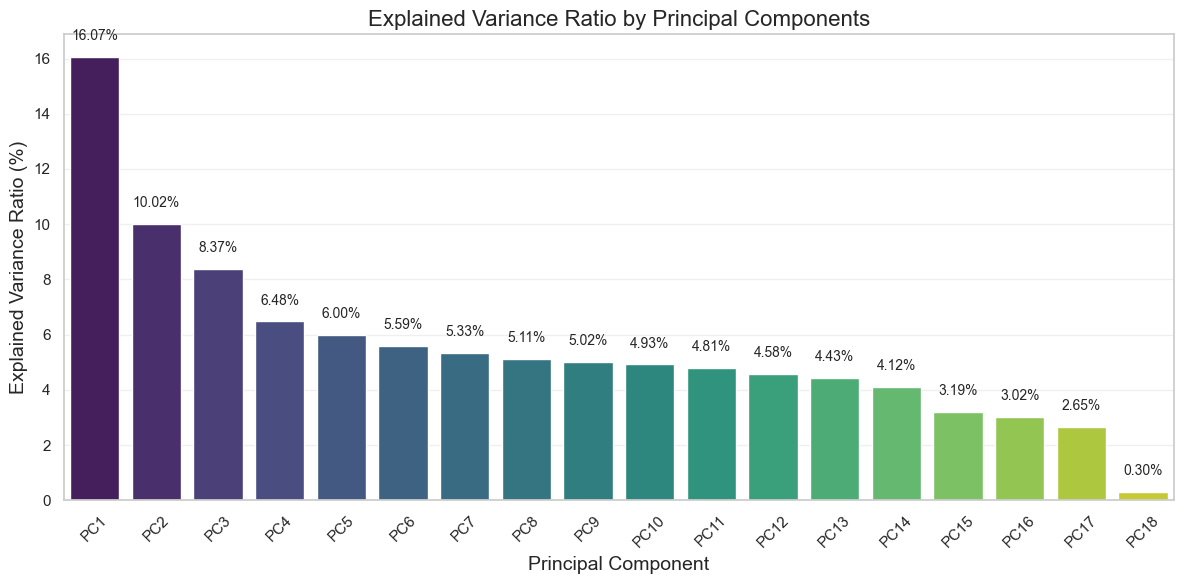

In [61]:
 from sklearn.decomposition import PCA
X_encoded = X.copy()
label_encoders = {}

# Label Encoding
for col in X_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])
    label_encoders[col] = le

# Standardization
scaler = StandardScaler()
features_scaled = scaler.fit_transform(X_encoded)

# PCA
pca = PCA()
pca_result = pca.fit_transform(features_scaled)
explained_variance_ratio = pca.explained_variance_ratio_

# Create DataFrame for plotting
pc_labels = [f'PC{i+1}' for i in range(len(explained_variance_ratio))]
explained_variance_data = pd.DataFrame({
    'Principal Component': pc_labels,
    'Explained Variance Ratio': explained_variance_ratio * 100  # in percentage
})

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Principal Component', y='Explained Variance Ratio',
            data=explained_variance_data, palette='viridis')

# Add percentage labels on top of each bar
for i, val in enumerate(explained_variance_data['Explained Variance Ratio']):
    plt.text(i, val + 0.5, f'{val:.2f}%', ha='center', va='bottom', fontsize=10)

# Enhance labels and aesthetics
plt.title('Explained Variance Ratio by Principal Components', fontsize=16)
plt.xlabel('Principal Component', fontsize=14)
plt.ylabel('Explained Variance Ratio (%)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [62]:
print(X["Diabetic_1"])

0         1.0
1         0.0
2         1.0
3         0.0
4         0.0
         ... 
301712    1.0
301713    0.0
301714    0.0
301715    0.0
301716    0.0
Name: Diabetic_1, Length: 301717, dtype: float64


In [63]:
scale = StandardScaler()
X_scaled = scale.fit_transform(X)

In [64]:
print(X_scaled)

[[-1.89560074  0.13686472 -0.4895863  ... -0.07030131  3.1837661
  -1.42085178]
 [-1.03642542  1.53175772 -0.4895863  ... -0.43882257 -0.50705407
  -0.05763632]
 [-0.1772501   0.69482192 -0.4895863  ...  2.01798582  3.1837661
   0.62397141]
 ...
 [-1.03642542 -0.42109248  1.77901986 ... -0.43882257 -0.50705407
  -0.73924405]
 [ 0.68192522 -1.53700688  1.77901986 ... -0.43882257 -0.50705407
   3.35040233]
 [ 2.40027587  1.53175772  1.77901986 ... -0.43882257 -0.50705407
   0.62397141]]


In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE  # Optional for handling class imbalance

def train_and_evaluate_model(model, dataset_name, model_name, 
                             sampler=None, hyperparameters=None, param_grid=None, 
                             test_size=0.33, random_state=42):

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_size, random_state=random_state)

    # Apply sampling (e.g., SMOTE for class imbalance) if specified
    print(sampler)
    print(hyperparameters)
    print(param_grid)
    if sampler:
        X_train, y_train = sampler.fit_resample(X_train, y_train)

    # Hyperparameter tuning using GridSearchCV if param_grid is provided
    if param_grid:
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        model = grid_search.best_estimator_
        print(f"Best parameters found by GridSearchCV for {model_name}: {grid_search.best_params_}")

    # Apply hyperparameters if specified and GridSearchCV is not used
    elif hyperparameters:
        try:
            model.set_params(**hyperparameters)
        except ValueError as e:
            print(f"Warning: {e}. Some parameters may not be applicable for the model {model_name}.")

    # Train the model
    model.fit(X_train, y_train)
    print(f"Trained Model: {model_name}")

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)

    # Store results
    results = {
        'model_name': model_name,
        'dataset_name': dataset_name,
        'accuracy': accuracy,
        'classification_report': report,
        'confusion_matrix': cm
    }
    
    return results


In [66]:
df_encoded.head()

BMI_Category  AgeCategory  Race  GenHealth  HeartDisease_1  Smoking_1  \
0           0.0          7.0   0.0        3.0             0.0        1.0   
1           1.0         12.0   0.0        3.0             0.0        0.0   
2           2.0          9.0   0.0        1.0             0.0        1.0   
3           1.0         11.0   0.0        2.0             0.0        0.0   
4           1.0          4.0   0.0        3.0             0.0        0.0   

   AlcoholDrinking_1  Stroke_1  DiffWalking_1  Sex_Male  Diabetic_1  \
0                0.0       0.0            0.0       0.0         1.0   
1                0.0       1.0            0.0       0.0         0.0   
2                0.0       0.0            0.0       1.0         1.0   
3                0.0       0.0            0.0       0.0         0.0   
4                0.0       0.0            1.0       0.0         0.0   

   PhysicalActivity_1  Asthma_1  KidneyDisease_1  SkinCancer_1    BMI  \
0                 1.0       1.0              0.0           1.0  16.60   
1                 1.0       0.0              0.0           0.0  20.34   
2                 1.0       1.0              0.0           0.0  26.58   
3                 0.0       0.0              0.0           1.0  24.21   
4                 1.0       0.0              0.0           0.0  23.71   

   PhysicalHealth  MentalHealth  SleepTime  
0             3.0          30.0        5.0  
1             0.0           0.0        7.0  
2            20.0          30.0        8.0  
3             0.0           0.0        6.0  
4            28.0           0.0        8.0

## Base Logistic Regression Model

In [67]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
results_log_reg = train_and_evaluate_model(model = log_reg,dataset_name = "Heart Disease", model_name = "Logistic Regression")


None
None
None


Trained Model: Logistic Regression


In [68]:
print(results_log_reg)

{'model_name': 'Logistic Regression', 'dataset_name': 'Heart Disease', 'accuracy': 0.9119286510590858, 'classification_report': {'0.0': {'precision': 0.9192458855318104, 'recall': 0.9903079620257351, 'f1-score': 0.953454672845109, 'support': 90693.0}, '1.0': {'precision': 0.5281803542673108, 'recall': 0.11088573360378634, 'f1-score': 0.18329142218496786, 'support': 8874.0}, 'accuracy': 0.9119286510590858, 'macro avg': {'precision': 0.7237131198995606, 'recall': 0.5505968478147607, 'f1-score': 0.5683730475150384, 'support': 99567.0}, 'weighted avg': {'precision': 0.8843918121496539, 'recall': 0.9119286510590858, 'f1-score': 0.8848131682667035, 'support': 99567.0}}, 'confusion_matrix': array([[89814,   879],
       [ 7890,   984]])}


{'model_name': 'Logistic Regression', 'dataset_name': 'Heart Disease', 'accuracy': 0.9119286510590858, 'classification_report': {'0.0': {'precision': 0.9192458855318104, 'recall': 0.9903079620257351, 'f1-score': 0.953454672845109, 'support': 90693.0}, '1.0': {'precision': 0.5281803542673108, 'recall': 0.11088573360378634, 'f1-score': 0.18329142218496786, 'support': 8874.0}, 'accuracy': 0.9119286510590858, 'macro avg': {'precision': 0.7237131198995606, 'recall': 0.5505968478147607, 'f1-score': 0.5683730475150384, 'support': 99567.0}, 'weighted avg': {'precision': 0.8843918121496539, 'recall': 0.9119286510590858, 'f1-score': 0.8848131682667035, 'support': 99567.0}}, 'confusion_matrix': array([[89814,   879],
       [ 7890,   984]])}


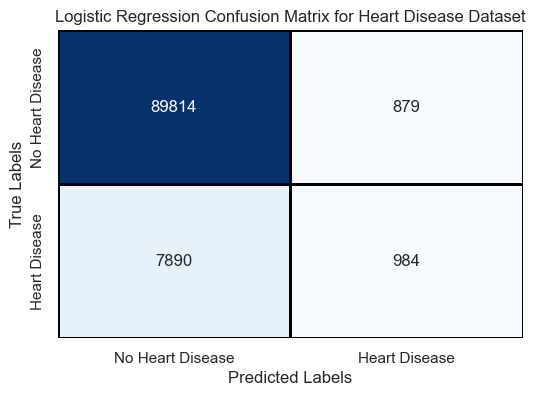

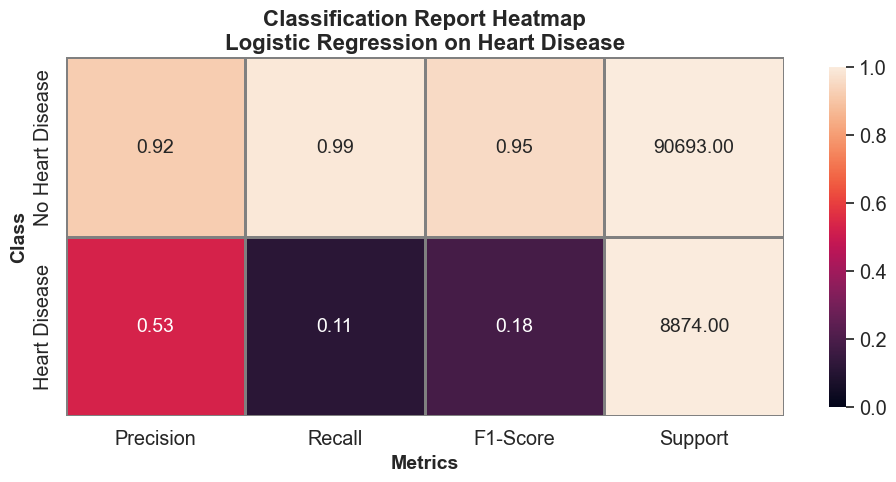

In [69]:
# Assuming results_log_reg is a dictionary
results_list = [results_log_reg]  # Wrap it in a list to iterate

for i in results_list:
    print(i)
    cm = i['confusion_matrix']
    model_name = i['model_name']
    dataset_name = i['dataset_name']
    report = i['classification_report']

    # Plot confusion matrix
    plot_confusion_heatmap(cm, dataset_name, model_name)

    # Plot classification report
    plot_classification_report_heatmap(report, dataset_name, model_name)


### BASE SVM

In [70]:
# from sklearn.svm import SVC

# # Base SVM model with default settings
# svm_base = SVC(random_state=42)

# # Train and evaluate the base SVM model
# results_svm_base = train_and_evaluate_model(model=svm_base, dataset_name="Heart Disease", model_name="SVM Base Model")


None
None
None


## base random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize RandomForest model
rf = RandomForestClassifier(random_state=42)

# Train and evaluate the Random Forest model
results_rf = train_and_evaluate_model(model=rf, dataset_name="Heart Disease", model_name="Random Forest")


None
None
None
Trained Model: Random Forest


{'model_name': 'Random Forest', 'dataset_name': 'Heart Disease', 'accuracy': 0.90177468438338, 'classification_report': {'0.0': {'precision': 0.9188433705003571, 'recall': 0.9785981277496609, 'f1-score': 0.94777984237842, 'support': 90693.0}, '1.0': {'precision': 0.3477822580645161, 'recall': 0.11663286004056796, 'f1-score': 0.17468354430379748, 'support': 8874.0}, 'accuracy': 0.90177468438338, 'macro avg': {'precision': 0.6333128142824367, 'recall': 0.5476154938951144, 'f1-score': 0.5612316933411087, 'support': 99567.0}, 'weighted avg': {'precision': 0.8679470262120321, 'recall': 0.90177468438338, 'f1-score': 0.8788769272648361, 'support': 99567.0}}, 'confusion_matrix': array([[88752,  1941],
       [ 7839,  1035]])}


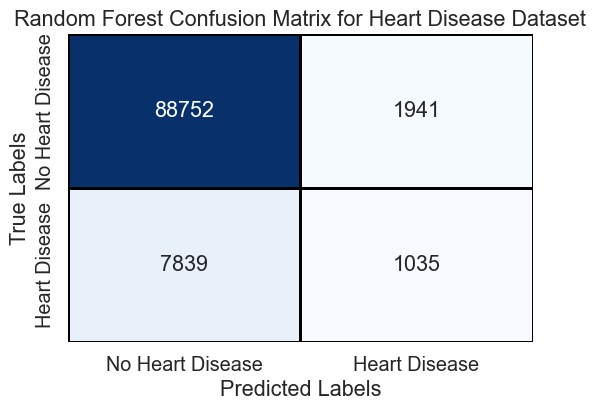

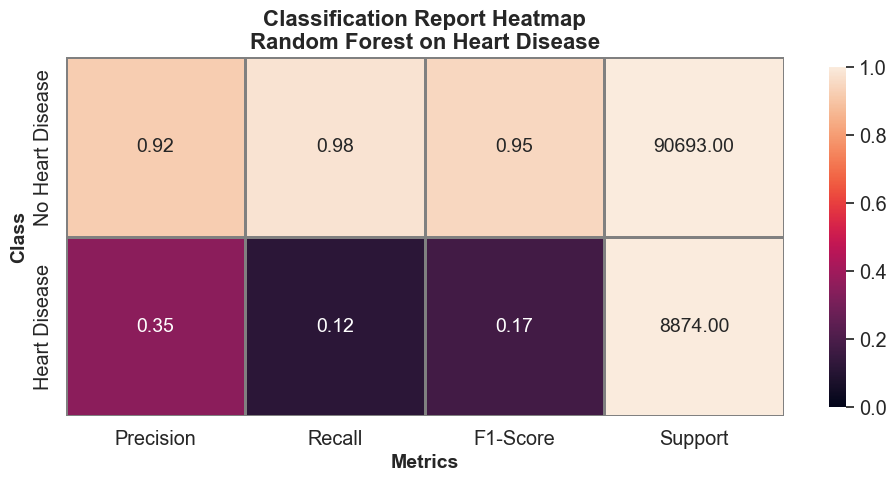

In [ ]:
# Assuming results_log_reg is a dictionary
results_list = [results_rf]  # Wrap it in a list to iterate

for i in results_list:
    print(i)
    cm = i['confusion_matrix']
    model_name = i['model_name']
    dataset_name = i['dataset_name']
    report = i['classification_report']

    # Plot confusion matrix
    plot_confusion_heatmap(cm, dataset_name, model_name)

    # Plot classification report
    plot_classification_report_heatmap(report, dataset_name, model_name)


### base gradient boost classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize GradientBoosting model
gb = GradientBoostingClassifier(random_state=42)

# Train and evaluate the Gradient Boosting Classifier model
results_gb = train_and_evaluate_model(model=gb, dataset_name="Heart Disease", model_name="Gradient Boosting")


None
None
None
Trained Model: Gradient Boosting


{'model_name': 'Gradient Boosting', 'dataset_name': 'Heart Disease', 'accuracy': 0.9121496078017817, 'classification_report': {'0.0': {'precision': 0.91786158647276, 'recall': 0.9923588369554431, 'f1-score': 0.9536575415768199, 'support': 90693.0}, '1.0': {'precision': 0.541969596827495, 'recall': 0.09240477800315529, 'f1-score': 0.15788966977953212, 'support': 8874.0}, 'accuracy': 0.9121496078017817, 'macro avg': {'precision': 0.7299155916501274, 'recall': 0.5423818074792992, 'f1-score': 0.555773605678176, 'support': 99567.0}, 'weighted avg': {'precision': 0.8843598688744385, 'recall': 0.9121496078017817, 'f1-score': 0.8827340017058876, 'support': 99567.0}}, 'confusion_matrix': array([[90000,   693],
       [ 8054,   820]])}


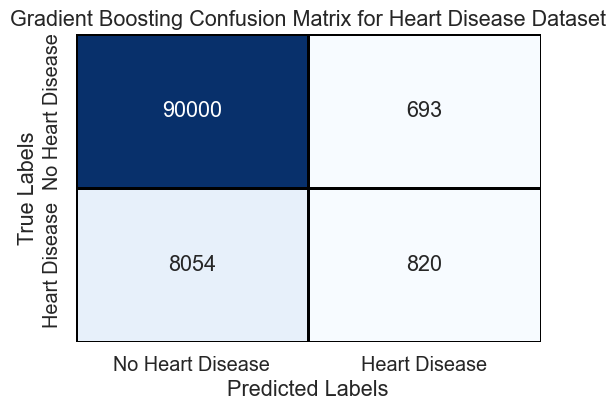

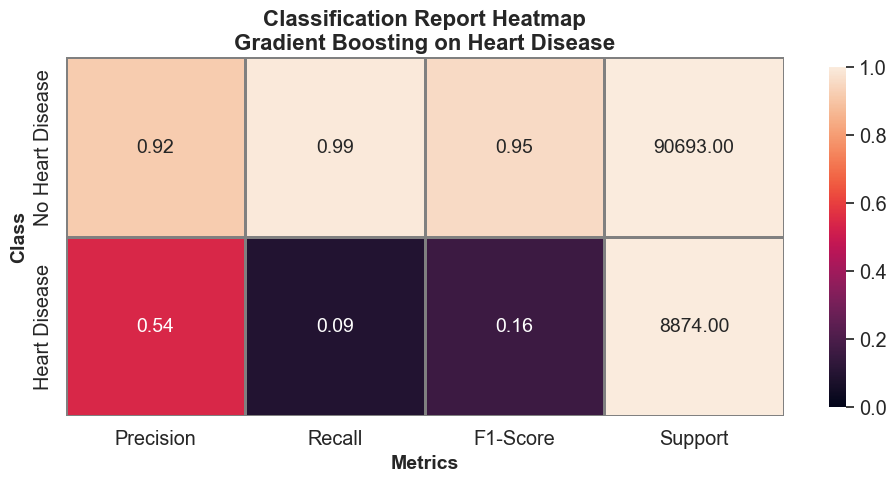

In [ ]:
# Assuming results_log_reg is a dictionary
results_list = [results_gb]  # Wrap it in a list to iterate

for i in results_list:
    print(i)
    cm = i['confusion_matrix']
    model_name = i['model_name']
    dataset_name = i['dataset_name']
    report = i['classification_report']

    # Plot confusion matrix
    plot_confusion_heatmap(cm, dataset_name, model_name)

    # Plot classification report
    plot_classification_report_heatmap(report, dataset_name, model_name)


### base LightGBM Model


In [ ]:
# import lightgbm as lgb

# # Initialize LightGBM model
# lgbm = lgb.LGBMClassifier(random_state=42)

# # Train and evaluate the LightGBM model
# results_lgbm = train_and_evaluate_model(model=lgbm, dataset_name="Heart Disease", model_name="LightGBM")


## Base Neural Network Model (MLP Classifier)


In [ ]:
from sklearn.neural_network import MLPClassifier

# Initialize Multi-layer Perceptron model (Neural Network)
mlp = MLPClassifier(max_iter=1000, random_state=42)

# Train and evaluate the Neural Network model
results_mlp = train_and_evaluate_model(model=mlp, dataset_name="Heart Disease", model_name="Neural Network")


None
None
None
Trained Model: Neural Network


{'model_name': 'Neural Network', 'dataset_name': 'Heart Disease', 'accuracy': 0.9111050850181285, 'classification_report': {'0.0': {'precision': 0.9190063689049989, 'recall': 0.9896243370491659, 'f1-score': 0.9530089458734836, 'support': 90693.0}, '1.0': {'precision': 0.5060367454068242, 'recall': 0.10863195853053866, 'f1-score': 0.17886631412932555, 'support': 8874.0}, 'accuracy': 0.9111050850181285, 'macro avg': {'precision': 0.7125215571559116, 'recall': 0.5491281477898523, 'f1-score': 0.5659376300014046, 'support': 99567.0}, 'weighted avg': {'precision': 0.882200073255609, 'recall': 0.9111050850181285, 'f1-score': 0.8840127753139844, 'support': 99567.0}}, 'confusion_matrix': array([[89752,   941],
       [ 7910,   964]])}


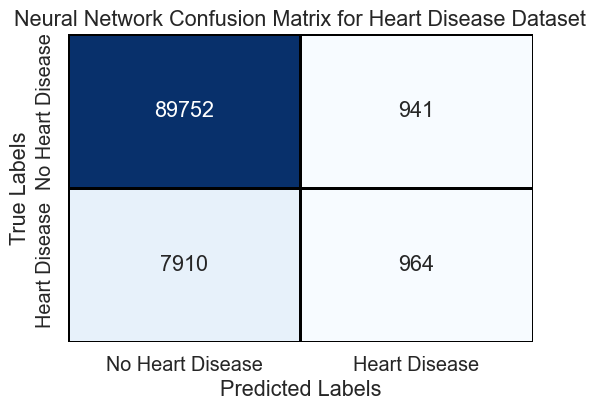

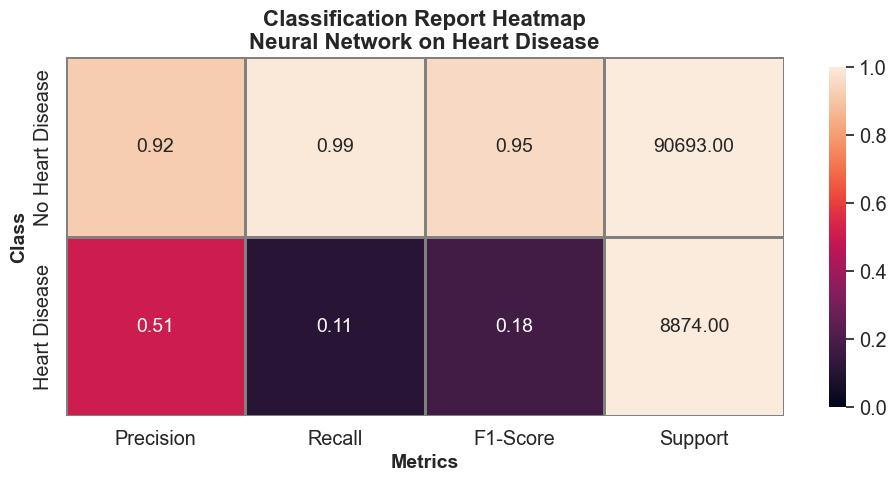

In [ ]:
# Assuming results_log_reg is a dictionary
results_list = [results_mlp]  # Wrap it in a list to iterate

for i in results_list:
    print(i)
    cm = i['confusion_matrix']
    model_name = i['model_name']
    dataset_name = i['dataset_name']
    report = i['classification_report']

    # Plot confusion matrix
    plot_confusion_heatmap(cm, dataset_name, model_name)

    # Plot classification report
    plot_classification_report_heatmap(report, dataset_name, model_name)


### BAse SVM

In [ ]:
# # Assuming results_log_reg is a dictionary
# results_list = [results_svm_base]  # Wrap it in a list to iterate

# for i in results_list:
#     print(i)
#     cm = i['confusion_matrix']
#     model_name = i['model_name']
#     dataset_name = i['dataset_name']
#     report = i['classification_report']

#     # Plot confusion matrix
#     plot_confusion_heatmap(cm, dataset_name, model_name)

#     # Plot classification report
#     plot_classification_report_heatmap(report, dataset_name, model_name)


## Model Tuning and Optimization

### A. Model Tuning and Optimization for Logistic Regression

In [ ]:
from imblearn.over_sampling import SMOTE

### SMOTE To over sampling
### SMOTE works by generating synthetic examples of the minority class, which helps balance the dataset,

### Smote helps to over sample data and it helps model to learn more about positive labels so it can make better predictions
### It helps to reduce Type 2 Error(False Negative Labels) and increase true positive labels. 

In [ ]:
model = LogisticRegression(max_iter=1000)
sampler = SMOTE(random_state=42)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['liblinear'],
    'max_iter': [100, 300, 500]
}


#### When the grid search is called with various params, it chooses the one with the highest score based on the given scorer func. Best estimator gives the info of the params that resulted in the highest score.

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
results_tuned_log_reg = train_and_evaluate_model(model = log_reg,dataset_name = "Heart Disease", model_name = "Logistic Regression", sampler=sampler,param_grid=param_grid )


SMOTE(random_state=42)
None
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l2'], 'solver': ['liblinear'], 'max_iter': [100, 300, 500]}


2071575.59s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
2071575.59s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
2071575.61s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
2071575.62s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
2071575.63s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
2071575.64s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
2071575.66s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
2071575.67s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
2071575.69s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
2071575.70s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
2071575.72s - pydevd

Best parameters found by GridSearchCV for Logistic Regression: {'C': 0.001, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Trained Model: Logistic Regression


{'model_name': 'Logistic Regression', 'dataset_name': 'Heart Disease', 'accuracy': 0.7425552642943948, 'classification_report': {'0.0': {'precision': 0.9705763221849323, 'recall': 0.7397924867409833, 'f1-score': 0.839614318518843, 'support': 90693.0}, '1.0': {'precision': 0.22471171851900523, 'recall': 0.77079107505071, 'f1-score': 0.3479764963243711, 'support': 8874.0}, 'accuracy': 0.7425552642943948, 'macro avg': {'precision': 0.5976440203519687, 'recall': 0.7552917808958466, 'f1-score': 0.5937954074216071, 'support': 99567.0}, 'weighted avg': {'precision': 0.9041004567583206, 'recall': 0.7425552642943948, 'f1-score': 0.7957966476624977, 'support': 99567.0}}, 'confusion_matrix': array([[67094, 23599],
       [ 2034,  6840]])}


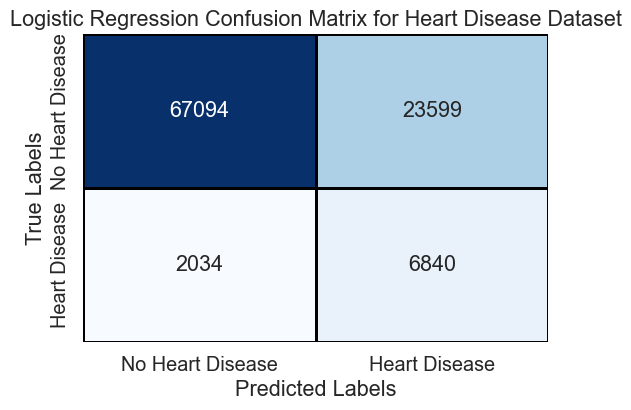

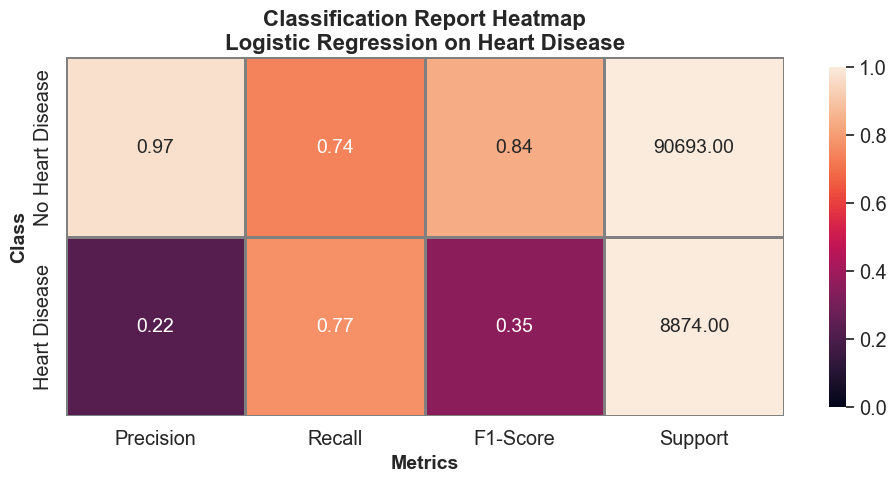

In [ ]:
# Assuming results_log_reg is a dictionary
results_list = [results_tuned_log_reg]  # Wrap it in a list to iterate

for i in results_list:
    print(i)
    cm = i['confusion_matrix']
    model_name = i['model_name']
    dataset_name = i['dataset_name']
    report = i['classification_report']

    # Plot confusion matrix
    plot_confusion_heatmap(cm, dataset_name, model_name)

    # Plot classification report
    plot_classification_report_heatmap(report, dataset_name, model_name)


### Hyper tuned Random Forest Classifer


In [ ]:
## hyper parameters for Random Forest Classifier
hyperparameters = {
                   'n_estimators': 100, 
                   'max_depth': 10,
                   'criterion':'gini',
                   'min_samples_split':2,
                   'bootstrap':True,
                   }
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'],
}



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize RandomForest model
rf = RandomForestClassifier(random_state=42)

# Train and evaluate the Random Forest model
results_rf_hyper_tuned = train_and_evaluate_model(model=rf,
                                      dataset_name="Heart Disease", 
                                      model_name="Random Forest",
                                      sampler=sampler,
                                      hyperparameters=hyperparameters,
                                      param_grid = param_grid
                                      )


SMOTE(random_state=42)
{'n_estimators': 100, 'max_depth': 10, 'criterion': 'gini', 'min_samples_split': 2, 'bootstrap': True}
{'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']}


Best parameters found by GridSearchCV for Random Forest: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}
Trained Model: Random Forest


{'model_name': 'Random Forest', 'dataset_name': 'Heart Disease', 'accuracy': 0.7723342071168158, 'classification_report': {'0.0': {'precision': 0.9640114050285807, 'recall': 0.7791450277309164, 'f1-score': 0.8617754308084442, 'support': 90693.0}, '1.0': {'precision': 0.23741719332977995, 'recall': 0.7027270678386297, 'f1-score': 0.35492316448491745, 'support': 8874.0}, 'accuracy': 0.7723342071168158, 'macro avg': {'precision': 0.6007142991791803, 'recall': 0.7409360477847731, 'f1-score': 0.6083492976466809, 'support': 99567.0}, 'weighted avg': {'precision': 0.89925303092255, 'recall': 0.7723342071168158, 'f1-score': 0.8166017586946417, 'support': 99567.0}}, 'confusion_matrix': array([[70663, 20030],
       [ 2638,  6236]])}


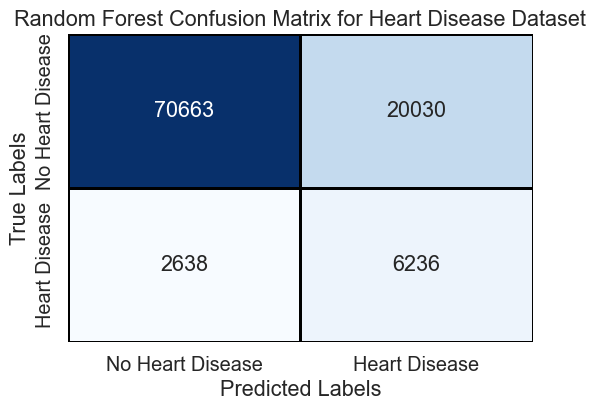

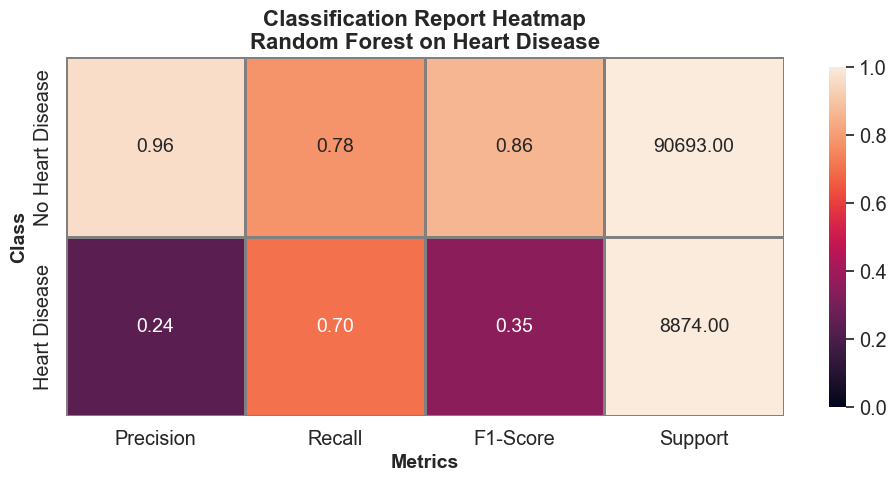

In [ ]:
# Assuming results_log_reg is a dictionary
results_list = [results_rf_hyper_tuned]  # Wrap it in a list to iterate

for i in results_list:
    print(i)
    cm = i['confusion_matrix']
    model_name = i['model_name']
    dataset_name = i['dataset_name']
    report = i['classification_report']

    # Plot confusion matrix
    plot_confusion_heatmap(cm, dataset_name, model_name)

    # Plot classification report
    plot_classification_report_heatmap(report, dataset_name, model_name)


### hyperparameter gradient boost classifier

## hyperparameter Neural network

In [ ]:
# Importing necessary libraries
from sklearn.neural_network import MLPClassifier
sampler = SMOTE(random_state=42)
# Neural Network parameter grid for GridSearchCV
nn_param_grid = {
    'hidden_layer_sizes': [(5,), (10,), (7, 7)],
    'activation': ['relu', 'tanh'],
    'solver': ['sgd'],  # Using stochastic gradient descent
    'learning_rate': ['constant', 'adaptive'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [200, 500]
}

nn_results = {}

In [ ]:

# Initialize Multi-layer Perceptron model (Neural Network)
mlp = MLPClassifier(max_iter=1000, random_state=42)

# Train and evaluate the Neural Network model
results_mlp_hyperparameterized = train_and_evaluate_model(model=mlp,
                                    dataset_name="Heart Disease",
                                    model_name="Neural Network",
                                    param_grid=nn_param_grid,
                                    sampler = sampler
                                    )


SMOTE(random_state=42)
None
{'hidden_layer_sizes': [(5,), (10,), (7, 7)], 'activation': ['relu', 'tanh'], 'solver': ['sgd'], 'learning_rate': ['constant', 'adaptive'], 'alpha': [0.0001, 0.001, 0.01], 'max_iter': [200, 500]}
Best parameters found by GridSearchCV for Neural Network: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive', 'max_iter': 200, 'solver': 'sgd'}
Trained Model: Neural Network


{'model_name': 'Neural Network', 'dataset_name': 'Heart Disease', 'accuracy': 0.9111050850181285, 'classification_report': {'0.0': {'precision': 0.9190063689049989, 'recall': 0.9896243370491659, 'f1-score': 0.9530089458734836, 'support': 90693.0}, '1.0': {'precision': 0.5060367454068242, 'recall': 0.10863195853053866, 'f1-score': 0.17886631412932555, 'support': 8874.0}, 'accuracy': 0.9111050850181285, 'macro avg': {'precision': 0.7125215571559116, 'recall': 0.5491281477898523, 'f1-score': 0.5659376300014046, 'support': 99567.0}, 'weighted avg': {'precision': 0.882200073255609, 'recall': 0.9111050850181285, 'f1-score': 0.8840127753139844, 'support': 99567.0}}, 'confusion_matrix': array([[89752,   941],
       [ 7910,   964]])}


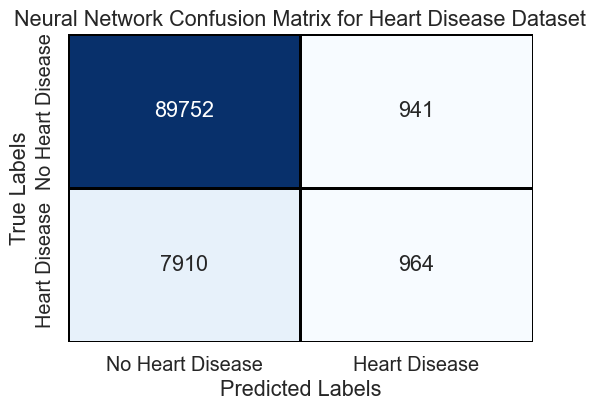

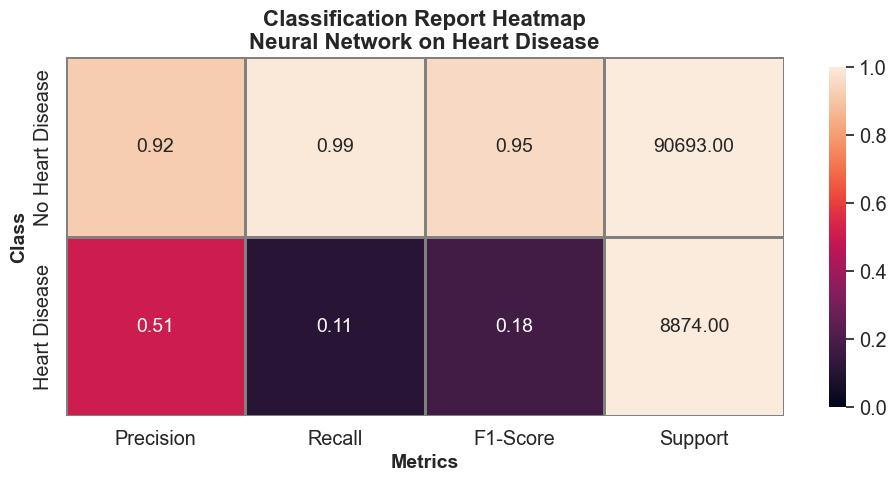

In [ ]:
# Assuming results_log_reg is a dictionary
results_list = [results_mlp]  # Wrap it in a list to iterate

for i in results_list:
    print(i)
    cm = i['confusion_matrix']
    model_name = i['model_name']
    dataset_name = i['dataset_name']
    report = i['classification_report']

    # Plot confusion matrix
    plot_confusion_heatmap(cm, dataset_name, model_name)

    # Plot classification report
    plot_classification_report_heatmap(report, dataset_name, model_name)


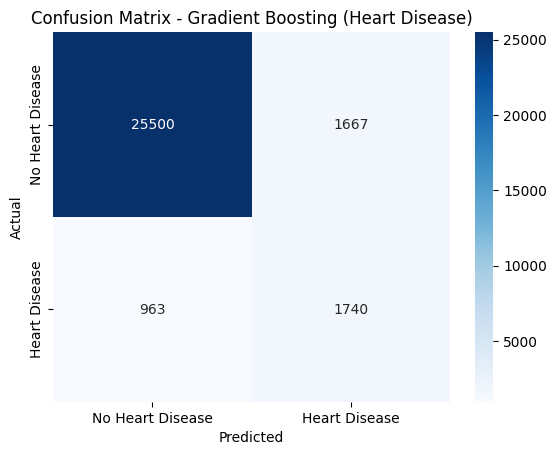

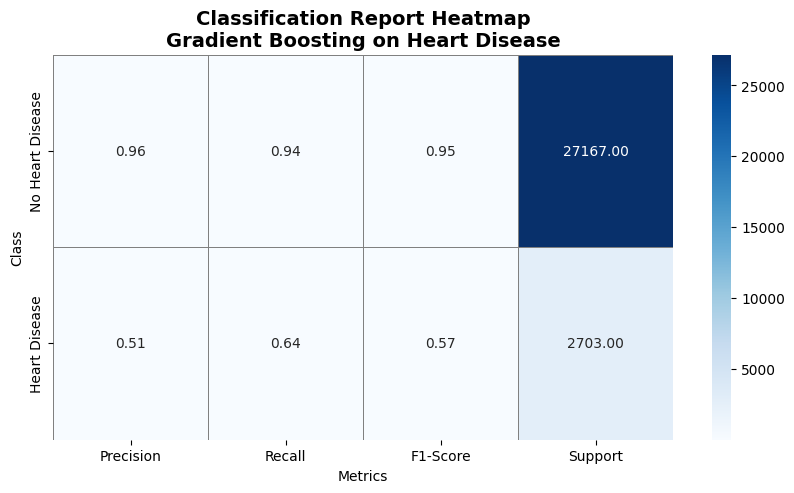

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# -------------------------------------
# Plot Confusion Matrix Heatmap
def plot_confusion_heatmap(cm, dataset_name, model_name):
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', ax=ax,
                xticklabels=['No Heart Disease', 'Heart Disease'],
                yticklabels=['No Heart Disease', 'Heart Disease'])
    ax.set_title(f'Confusion Matrix - {model_name} ({dataset_name})')
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    plt.show()

# -------------------------------------
# Plot Classification Report Heatmap
def plot_classification_report_heatmap(report, dataset_name, model_name):
    report_df = pd.DataFrame(report).transpose()
    class_labels = ['No Heart Disease', 'Heart Disease']
    report_df = report_df.loc[class_labels, ['precision', 'recall', 'f1-score', 'support']]
    report_df.columns = ['Precision', 'Recall', 'F1-Score', 'Support']
    report_df.index.name = 'Class'
    display_df = report_df.copy()
    display_df.iloc[:, :3] = display_df.iloc[:, :3].round(2)
    display_df['Support'] = display_df['Support'].astype(int)

    fig, ax = plt.subplots(figsize=(10, 5))
    sns.heatmap(display_df, annot=True, fmt='.2f', cmap='Blues', cbar=True, linewidths=0.5, linecolor='gray')
    ax.set_title(f'Classification Report Heatmap\n{model_name} on {dataset_name}', fontsize=14, weight='bold')
    ax.set_xlabel('Metrics')
    ax.set_ylabel('Class')
    plt.show()

# -------------------------------------
# Confusion matrix for Gradient Boosting (91.31% Accuracy)
conf_matrix = np.array([
    [25500, 1667],  # TN, FP
    [963,   1740]   # FN, TP
])

# Reconstruct y_true and y_pred from confusion matrix
y_true = (
    [0] * 27167 +  # Actual: No Heart Disease
    [1] * 2703     # Actual: Heart Disease
)

y_pred = (
    [0] * 25500 + [1] * 1667 +  # Predicted for actual No Heart Disease
    [0] * 963   + [1] * 1740    # Predicted for actual Heart Disease
)

# Generate classification report
target_names = ['No Heart Disease', 'Heart Disease']
report = classification_report(y_true, y_pred, target_names=target_names, output_dict=True)

# -------------------------------------
# Plot results
plot_confusion_heatmap(conf_matrix, dataset_name="Heart Disease", model_name="Gradient Boosting")
plot_classification_report_heatmap(report, dataset_name="Heart Disease", model_name="Gradient Boosting")
